In [1]:
##############################
# Author: Jacob van de Lindt
# Date:   Oct 16, 2023
# MIT PSFC
##############################

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib import ticker, cm 
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import os, sys
import netCDF4

In [2]:
# Setting up the paths to the local directory
wkdir = os.getcwdb()

In [3]:
# Loading up the netcdf4 datasets
remoteDirectory = open(f'../../../../remoteDirectory.txt', 'r').readlines()[0].strip()
print('You are using remoteDirectory = ', remoteDirectory)
shotNum = remoteDirectory.split('/')[-1].split('_')[1]

You are using remoteDirectory =  ~/HFW_147634


In [4]:
# Get the case
cql_nc = netCDF4.Dataset(f'cql3d_rfpwr_0_7.nc','r')
cqlrf_nc = netCDF4.Dataset(f'cql3d_krf_rfpwr_0_7.nc','r')

In [5]:
rya = cql_nc.variables["rya"][:]

#pitch angles mesh at which f is defined in radians.
#Note that np.ma.getdata pulls data through mask which
# rejects bad data (NAN, etc)
pitchAngleMesh = np.ma.getdata(cql_nc.variables["y"][:])

#normalized speed mesh of f
normalizedVel = cql_nc.variables["x"][:]

enerkev = cql_nc.variables["enerkev"][:]

#flux surface average energy per particle in keV 
energy = cql_nc.variables["energy"][:]



['6e19', '6e19', '6e19', '5.986725056634288e19', '5.986725056634288e19', '5.986725056634288e19', '5.948518485302237e19', '5.948518485302237e19', '5.948518485302237e19', '5.887259120967139e19', '5.887259120967139e19', '5.887259120967139e19', '5.80455313706103e19', '5.80455313706103e19', '5.80455313706103e19', '5.702018824288829e19', '5.702018824288829e19', '5.702018824288829e19', '5.581357329271045e19', '5.581357329271045e19', '5.581357329271045e19', '5.444483787761028e19', '5.444483787761028e19', '5.444483787761028e19', '5.2945027091694944e19', '5.2945027091694944e19', '5.2945027091694944e19', '5.13546261090572e19', '5.13546261090572e19', '5.13546261090572e19', '4.972371000723766e19', '4.972371000723766e19', '4.972371000723766e19', '4.810849763151402e19', '4.810849763151402e19', '4.810849763151402e19', '4.6564296560072016e19', '4.6564296560072016e19', '4.6564296560072016e19', '4.514401272324039e19', '4.514401272324039e19', '4.514401272324039e19', '4.388320401667927e19', '4.388320401667

Text(0.5, 1.0, 'Genray Density Profile')

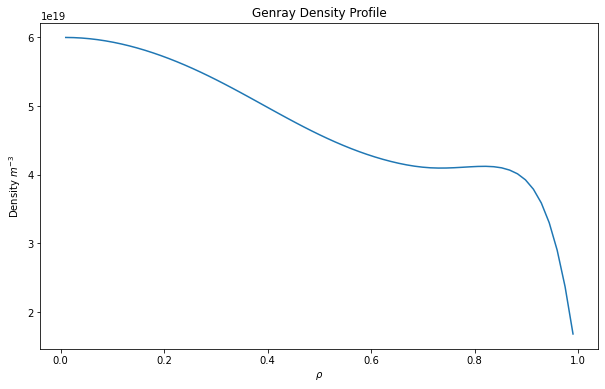

In [6]:
# Get the temperature and density profiles for the shot
denstring = '6d+19 6d+19 6d+19 5.986725056634288d+19 5.986725056634288d+19 5.986725056634288d+19 5.948518485302237d+19 5.948518485302237d+19 5.948518485302237d+19 5.887259120967139d+19 5.887259120967139d+19 5.887259120967139d+19 5.80455313706103d+19 5.80455313706103d+19 5.80455313706103d+19 5.702018824288829d+19 5.702018824288829d+19 5.702018824288829d+19 5.581357329271045d+19 5.581357329271045d+19 5.581357329271045d+19 5.444483787761028d+19 5.444483787761028d+19 5.444483787761028d+19 5.2945027091694944d+19 5.2945027091694944d+19 5.2945027091694944d+19 5.13546261090572d+19 5.13546261090572d+19 5.13546261090572d+19 4.972371000723766d+19 4.972371000723766d+19 4.972371000723766d+19 4.810849763151402d+19 4.810849763151402d+19 4.810849763151402d+19 4.6564296560072016d+19 4.6564296560072016d+19 4.6564296560072016d+19 4.514401272324039d+19 4.514401272324039d+19 4.514401272324039d+19 4.388320401667927d+19 4.388320401667927d+19 4.388320401667927d+19 4.281228931918998d+19 4.281228931918998d+19 4.281228931918998d+19 4.195155884299396d+19 4.195155884299396d+19 4.195155884299396d+19 4.133155055081277d+19 4.133155055081277d+19 4.133155055081277d+19 4.100435183688871d+19 4.100435183688871d+19 4.100435183688871d+19 4.100124665080464d+19 4.100124665080464d+19 4.100124665080464d+19 4.116454598261814d+19 4.116454598261814d+19 4.116454598261814d+19 4.118962810907007d+19 4.118962810907007d+19 4.118962810907007d+19 4.052988175976845d+19 4.052988175976845d+19 4.052988175976845d+19 3.808795850871087d+19 3.808795850871087d+19 3.808795850871087d+19 3.1393189052966003d+19 3.1393189052966003d+19 3.1393189052966003d+19 1.6795637554512267d+19 1.6795637554512267d+19 1.6795637554512267d+19'
tempstring = '4.44281 5.92375 5.92375 4.43003 5.90671 5.90671 4.39292 5.85723 5.85723 4.3328 5.77706 5.77706 4.25065 5.66753 5.66753 4.1474 5.52987 5.52987 4.024 5.36534 5.36534 3.8814 5.17521 5.17521 3.72173 4.96231 4.96231 3.54797 4.73063 4.73063 3.36412 4.48549 4.48549 3.1749 4.2332 4.2332 2.9853 3.98039 3.98039 2.79999 3.73332 3.73332 2.62237 3.49649 3.49649 2.45457 3.27276 3.27276 2.29738 3.06318 3.06318 2.15171 2.86895 2.86895 2.01948 2.69264 2.69264 1.90409 2.53879 2.53879 1.80979 2.41305 2.41305 1.72656 2.30208 2.30208 1.62506 2.16674 2.16674 1.44556 1.92741 1.92741 1.03492 1.37989 1.37989 0.10969 0.14625 0.14625'
denstring = denstring.replace('d+', 'e')
denstringlist = denstring.split()
tempstringlist = tempstring.split()
print(denstringlist)
dens = np.zeros((len(denstringlist), 1))
for i in range(len(denstringlist)): 
    dens[i] = float(denstringlist[i])

temps = np.zeros((len(tempstringlist), 1))
for i in range(len(tempstringlist)): 
    temps[i] = float(tempstringlist[i])

#print(temps.reshape(int(dens.shape[0]/3), 3))
dens = dens.reshape(int(dens.shape[0]/3), 3)[:, 0]
temps = temps.reshape(int(temps.shape[0]/3), 3)[:, 1]

rhotemps = np.linspace(0.01, .99, temps.shape[0])
rhodens = np.linspace(0.01, .99, dens.shape[0])

from scipy.interpolate import interp1d
get_dens_from_rho = interp1d(rhodens, dens, kind='cubic')
get_temps_from_rho = interp1d(rhotemps, temps, kind='cubic')
rho = np.ma.getdata(rya)

# Create an array over rho of the pre-cql density and temperature 
# profiles
genray_density = get_dens_from_rho(rho)
genray_temps = get_temps_from_rho(rho)

plt.figure(figsize=(10,6))
plt.plot(rho, genray_density)
plt.xlabel(r'$\rho$')
plt.ylabel(r'Density $m^{-3}$')
plt.title('Genray Density Profile')



Text(0.5, 1.0, 'Genray Temperature Profile')

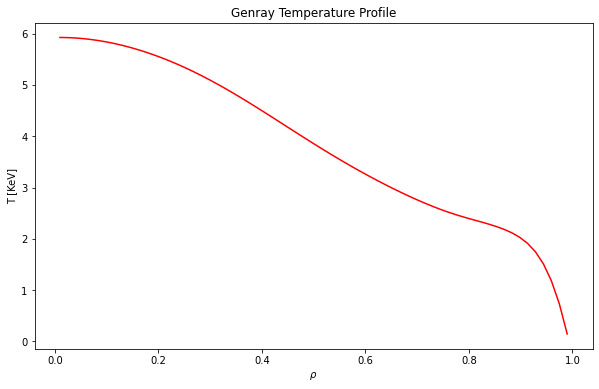

In [7]:
plt.figure(figsize=(10,6))
plt.xlabel(r'$\rho$')
plt.ylabel('T [KeV]')
plt.plot(rho, genray_temps, color='red')
plt.title('Genray Temperature Profile')


<ipython-input-8-d8fd0304ada8>:22: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = ax.pcolormesh(VPARA, VPERP, np.log(f_at_rho.T + 1))#np.log(f_at_rho.T+1))


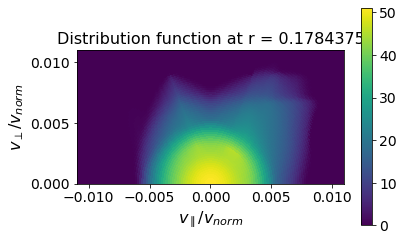

In [8]:
f = cql_nc.variables["f"][:]
ebkev = 80 # kev TODO: make sure this matches the file!! 
## Plot the distrobution function at a particular rho
rhoi = 0.1829 #0.25
i_rho = np.argmin(np.abs(rhoi - rya))

f_at_rho = f[0, i_rho, :, :]#f[0, i_rho, :, :]

pitchAngles = pitchAngleMesh[i_rho,:]
x = cql_nc.variables["x"][:]

V, Theta = np.meshgrid(x, pitchAngles)
VPARA = V*np.cos(Theta); VPERP = V*np.sin(Theta)

plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('axes', labelsize = 16)
plt.rc('axes', titlesize = 16)
plt.rc('figure', titlesize = 18)
plt.rc('legend', fontsize = 14)
fig,ax = plt.subplots()
pc = ax.pcolormesh(VPARA, VPERP, np.log(f_at_rho.T + 1))#np.log(f_at_rho.T+1))
#ax.contourf(VPARA, VPERP, np.log(relevantF.T), cmap=cm.PuBu_r, levels = 100)
ax.set_aspect('equal')
ax.set_xlabel("$v_\parallel / v_{norm}$")
ax.set_ylabel("$v_\perp / v_{norm}$")
ax.set_ylim([0,0.011]); ax.set_xlim([-0.011,0.011])
ax.set_title(f'Distribution function at r = {rya[i_rho]}')
fig.colorbar(pc)
plt.show()

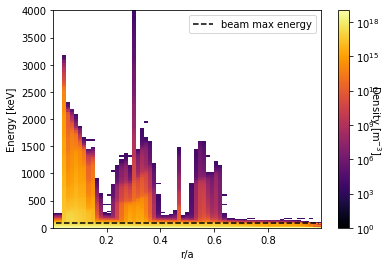

In [9]:
# Build the plot of energetic particles for a particular distrobution 

minEnergy = 2 # minimum energy for plotting

#index of that minimum energy in enerkev
#this index is also the index for the corresponding velocity
minEnergyIndex = np.where(enerkev < minEnergy)[0][-1]
#distribution function for energetic particles
energeticF = f[0, :,minEnergyIndex:,:]#f[0, :,minEnergyIndex:,:]

# begin integrating over velocity space 
energeticF_integOverPitch = np.zeros((len(rya), len(enerkev[minEnergyIndex:])))

# loop over r/a. At each r/a, integrate over all pitch angle. 
for rhoIndex in range(len(rya)):
    #this is the angular part of the spherical jacobian
    integOverPitch = 2*np.pi*np.trapz(energeticF[rhoIndex,:]*np.sin(pitchAngleMesh[rhoIndex]), pitchAngleMesh[rhoIndex], axis = 1)
    energeticF_integOverPitch[rhoIndex,:] = integOverPitch

relevantEnergies = enerkev[minEnergyIndex:]
relevantVels = normalizedVel[minEnergyIndex:]
energeticDensity = np.zeros((len(rya), len(relevantEnergies)-1))
#the energies at which the values of energeticDensity are centered
energyCenters = (relevantEnergies[1:] + relevantEnergies[:-1])/2
#We calculate energy centers by integrating up to the velocity mesh point on either side of the corresponding energyCenter point
#we then take the differences, which is the area in the bin between these two edges
for velIndex in range(len(relevantVels)-1):
    #this is the radial part of the spherical jacobian
    densityLower = np.ma.getdata(np.trapz(energeticF_integOverPitch[:,:velIndex]*relevantVels[:velIndex]**2,
        relevantVels[:velIndex]))
    densityUpper = np.ma.getdata(np.trapz(energeticF_integOverPitch[:,:velIndex+1]*relevantVels[:velIndex+1]**2,
        relevantVels[:velIndex+1]))

    if velIndex == 0:
        energeticDensity[:,velIndex] = densityUpper
        continue

    diff = densityUpper - densityLower

    energeticDensity[:,velIndex] = diff
    
energeticDensity = energeticDensity*1e6#convert to m^(-3)
energeticDensity = energeticDensity.astype('float64')
rya = rya.astype('float64')
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('axes', labelsize = 10)
plt.rc('axes', titlesize = 10)
plt.rc('figure', titlesize = 10)
plt.rc('legend', fontsize = 10)

fig, ax = plt.subplots()

pcm = ax.pcolormesh(rya.T, energyCenters.T, energeticDensity.T, 
                norm=colors.LogNorm(vmin=1, vmax=np.max(energeticDensity.T)),
                shading = 'nearest', cmap='inferno')

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(r'Density [m$^{-3}$]', rotation=270)
ax.set_ylim([0,4000])
plt.savefig('heatmap.png')
plt.plot(rya, (rya/rya)*ebkev, 'k--', label='beam max energy')
plt.xlabel('r/a')
plt.ylabel('Energy [keV]')
plt.legend()
plt.show()

Total RF power to ions:  0.6963 MW
Total NB power to ions:  4.7337 MW


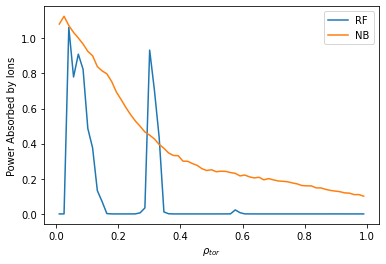

In [10]:
# Get the RF and NB power deposition to ions versus rho 
dvol = cql_nc.variables['dvol'][:]
powers = cql_nc.variables['powers'][-1, 0, :, :]
powers_RF = powers[4, :]
powers_NB = powers[5, :]
plt.plot(rya, powers_RF, label='RF')
plt.plot(rya, powers_NB, label='NB')

total_RF_power_to_ions = np.trapz(powers_RF*dvol*(1/100)**3)
total_NB_power_to_ions = np.trapz(powers_NB*dvol*(1/100)**3)
print('Total RF power to ions: ', np.round(total_RF_power_to_ions, 4), 'MW')
print('Total NB power to ions: ', np.round(total_NB_power_to_ions, 4), 'MW')
plt.ylabel('Power Absorbed by Ions')
plt.xlabel(r'$\rho_{tor}$')
plt.legend()

In [11]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Section for computing the slwoing down time for a beam of particles against a thermal background
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
pi = np.pi
epsi0 = 8.8541e-12
mD = 3.3435e-27
m_alpha = 6.644657e-27
me = 9.11e-31
e = 1.6022e-19

def nu_be(vb, Te, ne, Zb, mb):
    """
    vb: beam velocity [m/s]
    Te: electron thermal background temperature [KeV]
    ne: electron thermal background density [m^-3]
    Zb: charge of the beam nucleus 
    mb: beam nuclear mass [kg]

    This function assumes vb^3 << v_the^3, the thermal electron velocity. Good up to alpha particles 
    Freidberg PPFE Equation 9.64 
    """
    Te_J = Te*1.6022e-19*1000  # convert to KeV to eV and then to J
    prefactor = 1 / (3*(2*pi)**(3/2))
    bot = epsi0**2*mb*Te_J**(3/2)
    top = Zb**2*e**4*me**0.5
    LAMDA = 12*pi*epsi0**(3/2)*Te_J**(3/2)/(ne**0.5*e**3)
    return prefactor*top*np.log(LAMDA)*ne/bot * (vb/vb)

def nu_bi(vb, Ti, ni, Zb, mb, mi):
    """
    vb: beam velocity [m/s]
    Ti: ion thermal background temperature [KeV]
    ni: ion thermal background density [m^-3]
    Zb: charge of the beam nucleus 
    mb: beam nuclear mass [kg]
    """
    mr = mb*mi/(mb + mi)
    Ti_J = Ti*1.6022e-19*1000  # convert to KeV to eV and then to J
    vTi = np.sqrt(2*Ti_J/mi)
    prefactor = 1 / (4*pi)
    bot = epsi0**2*mb*mr
    top = Zb**2*e**4*ni
    LAMDA = 12*pi*epsi0**(3/2)*Ti_J**(3/2)/(ni**0.5*e**3)
    postfactor = 1 / (  vb**3  + 1.3*vTi**3 )
    return prefactor*top*np.log(LAMDA)*postfactor/bot

Tk = 15
Ealpha = 3.5e6*1.6022e-19
v_alpha = np.sqrt(Ealpha*2/m_alpha)
print('v_alpha: ', v_alpha)
ne = 2e20

nu_be_Jeff = 100*2/Tk**(3/2)
nu_be_Jacob = nu_be(v_alpha, Tk, ne, Zb=2, mb=m_alpha)
print('Jeffs nu_be ', nu_be_Jeff)
print('Jacobs nu_be ', nu_be_Jacob)

nu_bi_Jeff = 0.94*2/(3.5)**(3/2)
print('Jeffs nu_bi: ', nu_bi_Jeff)

nu_bi_Jacob = nu_bi(v_alpha, Tk, ne, Zb=2, mb=m_alpha, mi=(mD+3*(mD/2))/2)
print('Jacobs nu_bi: ', nu_bi_Jacob)

v_alpha:  12991853.06084574
Jeffs nu_be  3.442651863295482
Jacobs nu_be  3.7172185848225845
Jeffs nu_bi:  0.28711493416877587
Jacobs nu_bi:  0.3064266374645527


1000
(1000,)


(0.0, 20.0)

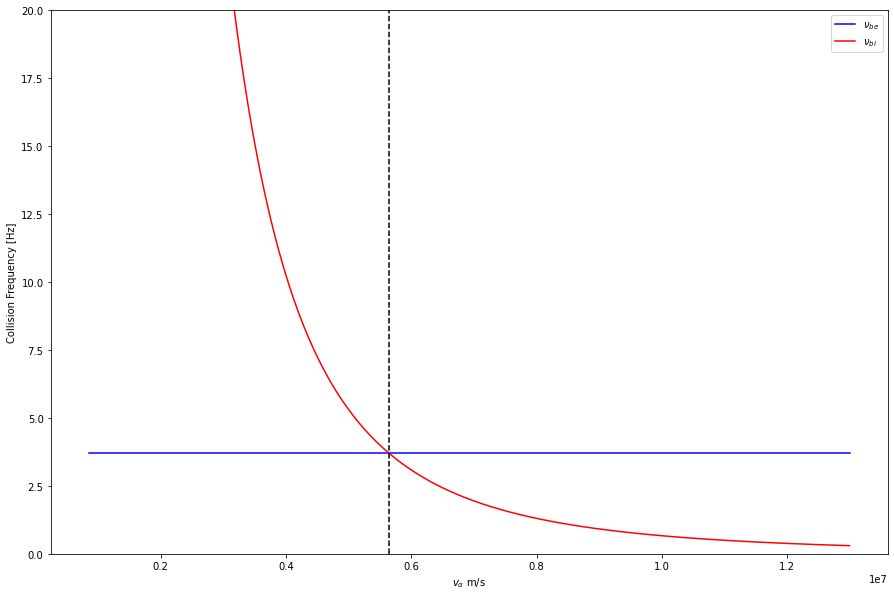

In [12]:
Tk = 15
ne = 2e20
vth = np.sqrt(2*Tk*1000*1.6022e-19/m_alpha)
vb_array = np.linspace(vth, v_alpha, 1000)
print(len(vb_array))
nu_be_array = nu_be(vb_array, Tk, ne, Zb=2, mb=m_alpha)
nu_bi_array = nu_bi(vb_array, Tk, ne, Zb=2, mb=m_alpha, mi=(mD+3*(mD/2))/2)
print(nu_be_array.shape)
plt.figure(figsize=(15,10))
plt.plot(vb_array, nu_be_array, label=r'$\nu_{be}$', color='blue')
plt.plot(vb_array, nu_bi_array, label=r'$\nu_{bi}$', color='red')
plt.axvline(x=np.sqrt(44*2*Tk*1000*1.6022e-19/m_alpha), linestyle='--', color='black')
plt.legend()
plt.xlabel(r'$v_{\alpha}$ m/s')
plt.ylabel('Collision Frequency [Hz]')
plt.ylim(0, 20)

<ipython-input-13-1bdf9f750881>:38: RuntimeWarning: invalid value encountered in divide
  plt.plot(tarr, vthb*(tarr/tarr), 'r--', label='Thermalized Beam Velocity')


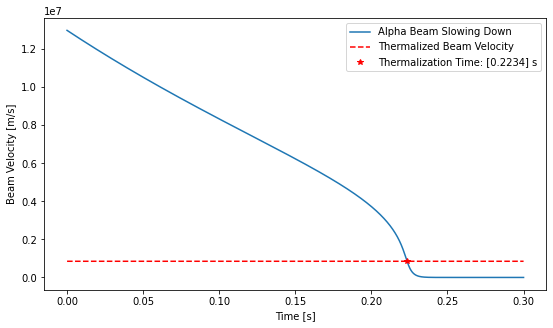

In [13]:
## Testing out the differential equation by solving numerically then analytically 

def beam_slowing_down_time(vb, T, n, Zb, mb, mi, tsim, nt):
    """
    Assumes Ti = Te, ni = ne 
    vb: initial beam velocity [m/s]
    T: thermal background temperature [KeV]
    n: thermal background density [m^-3]
    Zb: charge of the beam nucleus 
    mb: beam nuclear mass [kg]
    mi: average mass of background plasma ions
    tsim: simulation time [s]
    nt: integer number of time steps to solve the differential equation
    """
    t_array = np.linspace(0, tsim, nt)
    dt = t_array[1] - t_array[0]

    vb_array = np.zeros_like(t_array)
    vb_array[0] = vb
    for i in range(1, t_array.shape[0]-1):
        nu_be_t = nu_be(vb_array[i-1], T, n, Zb, mb)
        nu_bi_t = nu_bi(vb_array[i-1], T, n, Zb, mb, mi)
        vb_array[i] = vb_array[i-1] - dt*vb_array[i-1]*(nu_bi_t + nu_be_t)
        #print(vb_array[i])
        #print('nu_bi:', nu_bi_t)
    
    return t_array, vb_array


Tk = 15
Tk_J = Tk*1000*1.6022e-19
vthb = np.sqrt(2*Tk_J/m_alpha)
n = 2e20
tarr, vbarr = beam_slowing_down_time(v_alpha, Tk, n, Zb=2, mb=m_alpha, mi=mD, tsim=0.3, nt=10000)

plt.figure(figsize=(9, 5))
plt.plot(tarr, vbarr, label='Alpha Beam Slowing Down')
plt.plot(tarr, vthb*(tarr/tarr), 'r--', label='Thermalized Beam Velocity')
plt.xlabel('Time [s]')
plt.ylabel('Beam Velocity [m/s]')

index_match = np.where(np.abs(vbarr-vthb) == min(np.abs(vbarr-vthb)))
plt.plot(tarr[index_match], vbarr[index_match], 'r*', label=f'Thermalization Time: {np.round(tarr[index_match], 4)} s')
plt.legend()

<ipython-input-14-91e182c6f9fc>:44: RuntimeWarning: invalid value encountered in divide
  plt.plot(tarr, vthb*(tarr/tarr), 'r--', label='Thermalized Beam Velocity')


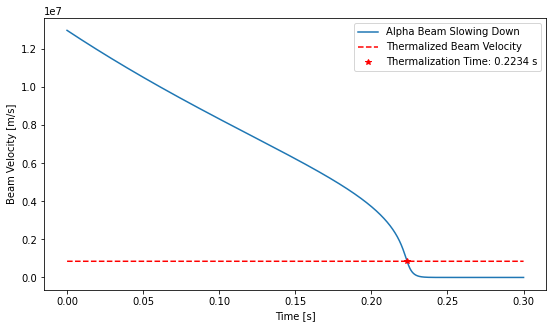

In [14]:
# analytic slowing down time calculation: 

def get_beam_slowing_down_time(vb, T, n, Zb, mb, mi):
    """
    Given a thermal bulk temperature T and bulk density n, this function 
    calculates how long it takes a particle of velocity vb with charge Zb and mass mb 
    to thermalize with the bulk ions mb 

    I assume ne = ni and Te = Ti, bulk electrons and ions are in thermal equilibrium and quasineutral.  

    Based on PPFE Jeff Freidberg page 202/203
    """
    A = nu_be(vb, T, ne, Zb, mb) # get the constant beam-electron collision rate
    mr = mb*mi/(mb + mi)
    Ti_J = T*1.6022e-19*1000  # convert to KeV to eV and then to J
    vTi = np.sqrt(2*Ti_J/mi)
    vT_alpha = np.sqrt(2*Ti_J/mb)
    prefactor = 1 / (4*pi)
    bot = epsi0**2*mb*mr
    top = Zb**2*e**4*n
    LAMDA = 12*pi*epsi0**(3/2)*Ti_J**(3/2)/(n**0.5*e**3)
    lnLAMDA = np.log(LAMDA)
    B = prefactor*top*lnLAMDA/bot
    C = 1.3*vTi**3
    
    # analytic solution to PPFE 9.62
    term1 = np.abs(A*vb**3 + A*C + B)   
    term2 = np.abs(A*vT_alpha**3 + A*C + B)
    t_top = B*np.log(term1/term2) + 3*A*C*np.log(np.abs(vb/vT_alpha)) 
    t_bot = 3*A**2*C + 3*A*B

    return t_top/t_bot


Tk = 15
Tk_J = Tk*1000*1.6022e-19
vthb = np.sqrt(2*Tk_J/m_alpha)
vTi = np.sqrt(2*Tk_J/m_alpha)
n = 2e20
tarr, vbarr = beam_slowing_down_time(v_alpha, Tk, n, Zb=2, mb=m_alpha, mi=mD, tsim=0.3, nt=10000)

plt.figure(figsize=(9, 5))
plt.plot(tarr, vbarr, label='Alpha Beam Slowing Down')
plt.plot(tarr, vthb*(tarr/tarr), 'r--', label='Thermalized Beam Velocity')
plt.xlabel('Time [s]')
plt.ylabel('Beam Velocity [m/s]')

#index_match = np.where(np.abs(vbarr-vthb) == min(np.abs(vbarr-vthb)))
time_to_slow = get_beam_slowing_down_time(v_alpha, Tk, n, Zb=2, mb=m_alpha, mi=mD)
plt.plot(time_to_slow, vTi, 'r*', label=f'Thermalization Time: {np.round(time_to_slow, 4)} s')
plt.legend()


RF power:  0.7795580349938382 MW/m^3


(0.0, 1000.0, 0.0, 2e+19)

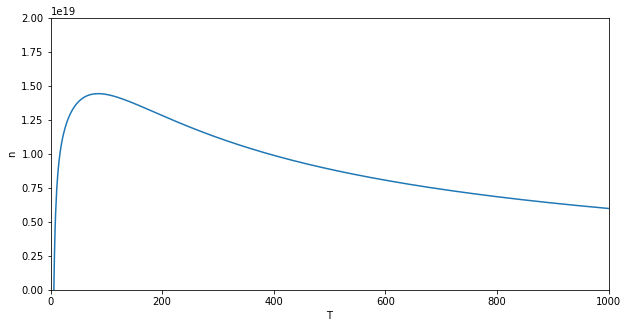

In [15]:
# cell to test out my function 
def get_n_from_T_P(Tfast, power, Tk, n, Zb, mb, mi):
    Tk_J = Tk*1.6022e-19*1000
    Tfast_J = Tfast*1.6022e-19*1000
    v_fast = np.sqrt(2*Tfast_J/mb)
    t_slow = get_beam_slowing_down_time(v_fast, Tk, n, Zb, mb, mi)

    return (2/3)*power*t_slow / Tfast_J


rhoindex = 3
T = genray_temps[rhoindex]
n = genray_density[rhoindex]
power = powers_RF[rhoindex]*1e6
print('RF power: ', power/1e6, 'MW/m^3')
plt.figure(figsize=(10,5))
Tfast_array = np.linspace(2, 1000, 1000)
# power = 1*1e6
nfast = 10*get_n_from_T_P(Tfast_array, power, Tk=T, n=n, Zb=1, mb=mD, mi=mD)
#print('nfast: ', nfast)
plt.plot(Tfast_array, nfast)
plt.xlabel('T')
plt.ylabel('n')
plt.axis([0, 1000, 0, 2e19])

In [16]:
# new section for figuringo out RF power partitioning


T: 5.900462769551153
n:  5.981878376842285
T3: 140.00000000000003
n3: 1.386998799351089e+18
n1:  5.042794848536404
n2:  0.7245311818037129
n3:  0.13869987993510888
T1:  5.859830494757375
T2:  20.38060436893215
T3:  140.00000000000003
Maxwellian total density:  5.042794689207373e+19
Maxwellian total density:  7.245311589140464e+18
Maxwellian total density:  1.3869987555659932e+18


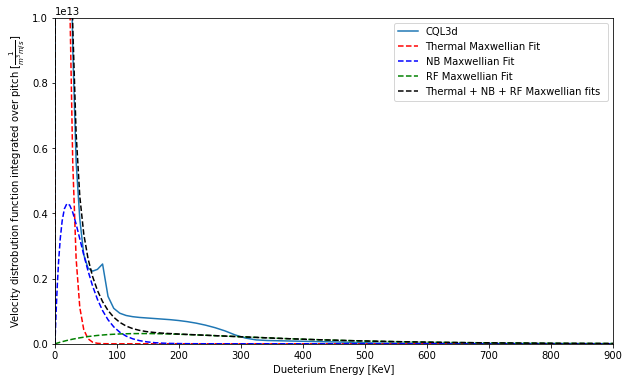

In [17]:
# Functions for fitting distrobution function 
denfact_NB = 5 #3
denfact_RF = 1

def plot_maxwell_given_n_T_enerkev(n, T, enerkev, plotlog, color, label):
    # T in KeV, n in m^-3
    #plt.plot(np.ma.getdata(rya), get_dens_from_rho(np.ma.getdata(rya)))
    M = 3.343e-27
    v_array = np.sqrt(2*enerkev*1e3*1.6022e-19/M)


    T = T*1e3*1.6022e-19 # J
    f_maxwell_cold = n*(M/(2*np.pi*T))**(3/2) * np.exp(-M*v_array**2/(2*T))

    # plt.plot(0.5*M*v_array**2/(1.6022e-19*1000), 4*np.pi*v_array*f_maxwell_cold[0, :], 'r--')
    # plt.plot(v_array, 4*np.pi*v_array**2*f_maxwell_cold[rhoindex, :], 'r--')
    if plotlog:
        plt.plot(0.5*M*v_array**2/(1.6022e-19*1000), np.log(4*np.pi*v_array**2*f_maxwell_cold+1), '--', color=color, label=label)
    else: 
        plt.plot(0.5*M*v_array**2/(1.6022e-19*1000), 4*np.pi*v_array**2*f_maxwell_cold, '--', color=color, label=label)
    print('Maxwellian total density: ', np.trapz(4*np.pi*v_array**2*f_maxwell_cold, v_array))
    max_energy_grid = 0.5*M*v_array**2/(1.6022e-19*1000)
    return max_energy_grid, 4*np.pi*v_array**2*f_maxwell_cold

def maxwellian_fit(enerkev, n1, T1, n2, T2, n3, T3):
    M = 3.343e-27
    v_array = np.sqrt(2*enerkev*1e3*1.6022e-19/M)
    #print(max(v_array))


    T1 = T1*1e3*1.6022e-19 # J
    T2 = T2*1e3*1.6022e-19 # J
    T3 = T3*1e3*1.6022e-19 # J

    n1 = n1*1e19  # m^-3
    n2 = n2*1e19  # m^-3
    n3 = n3*1e19  # m^-3

    f_maxwell_1 = n1*(M/(2*np.pi*T1))**(3/2) * np.exp(-M*v_array**2/(2*T1))
    integrated_over_pitch_1 = 4*np.pi*v_array**2*f_maxwell_1

    f_maxwell_2 = n2*(M/(2*np.pi*T2))**(3/2) * np.exp(-M*v_array**2/(2*T2))
    integrated_over_pitch_2 = 4*np.pi*v_array**2*f_maxwell_2

    f_maxwell_3 = n3*(M/(2*np.pi*T3))**(3/2) * np.exp(-M*v_array**2/(2*T3))
    integrated_over_pitch_3 = 4*np.pi*v_array**2*f_maxwell_3

    return integrated_over_pitch_1 + integrated_over_pitch_2 + integrated_over_pitch_3

def maxwellian_fit2(enerkev, n1, T1, T2, T3):
    M = 3.343e-27 # mass of D, both the beam and thermal ion
    v_array = np.sqrt(2*enerkev*1e3*1.6022e-19/M)
    
    P_RF = powers_RF[rhoindex]*1e6  # W/m^3
    P_NB = powers_NB[rhoindex]*1e6  # rhoindex is of scope +1 when used with fit_three_guassians_to_cql2
    T = genray_temps[rhoindex]
    n = genray_density[rhoindex]

    T1 = T1*1e3*1.6022e-19 # J
    T2 = T2*1e3*1.6022e-19 # J
    T3 = T3*1e3*1.6022e-19 # J

    v2 = np.sqrt(2*T2/M)
    v3 = np.sqrt(2*T3/M)

    t_slow_NB = get_beam_slowing_down_time(v2, T, n, Zb=1, mb=M, mi=M)
    t_slow_RF = get_beam_slowing_down_time(v3, T, n, Zb=1, mb=M, mi=M)

    # print('t_slow_NB: ', t_slow_NB)
    # print('t_slow_RF: ', t_slow_RF)

    n2 = denfact_NB*(2/3)*P_NB*t_slow_NB/T2  #TODO: remove x10
    n3 = denfact_RF*(2/3)*P_RF*t_slow_RF/T3
    #print('>> n2: ', n2)
    n1 = n1*1e19  # m^-3

    f_maxwell_1 = n1*(M/(2*np.pi*T1))**(3/2) * np.exp(-M*v_array**2/(2*T1))
    integrated_over_pitch_1 = 4*np.pi*v_array**2*f_maxwell_1

    f_maxwell_2 = n2*(M/(2*np.pi*T2))**(3/2) * np.exp(-M*v_array**2/(2*T2))
    integrated_over_pitch_2 = 4*np.pi*v_array**2*f_maxwell_2

    f_maxwell_3 = n3*(M/(2*np.pi*T3))**(3/2) * np.exp(-M*v_array**2/(2*T3))
    integrated_over_pitch_3 = 4*np.pi*v_array**2*f_maxwell_3

    return integrated_over_pitch_1 + integrated_over_pitch_2 + integrated_over_pitch_3
    
def fit_three_guassians_to_cql(enerkev, cql_nc, rhoindex, bounds):
    M = 3.343e-27
    vnorm = np.ma.getdata(cql_nc.variables['vnorm'])
    cint2 = cql_nc.variables['cint2']
    x_squared_dx = np.ma.getdata(cint2)
    cynt2 = cql_nc.variables['cynt2']
    normalizedVel = np.ma.getdata(cql_nc.variables['x'][:])
    two_pi_siny_dy = np.ma.getdata(cynt2)  # note that the pitch angle mesh depends on the radial location 

    ff = cql_nc.variables["f"][:][0]
    T = genray_temps[rhoindex]
    n = genray_density[rhoindex]/1e19
    integrated_over_pitch = np.trapz(ff[rhoindex, :]*two_pi_siny_dy[rhoindex], axis=1)
    integrated_over_pitch = 1e6*integrated_over_pitch*normalizedVel**2*(1/vnorm)*100  # SI units
    
    # popt = curve_fit(maxwellian_fit, enerkev, integrated_over_pitch, p0=[n, T, .1*n, 30, .1*n, 0.9*bounds[-1][-1] ], bounds=bounds)
    popt = curve_fit(maxwellian_fit, enerkev, integrated_over_pitch, p0=[n, T, .1*n, 4*T, .1*n, 0.9*bounds[-1][-1] ], bounds=bounds)
    #popt = curve_fit(maxwellian_fit, enerkev, integrated_over_pitch, p0=[1, 8, .4, 30, .1, 200 ])
    #print(len(popt[0]))
    n1 = popt[0][0]
    T1 = popt[0][1]
    n2 = popt[0][2]
    T2 = popt[0][3]
    n3 = popt[0][4]
    T3 = popt[0][5]

    return integrated_over_pitch, n1, T1, n2, T2, n3, T3

def fit_three_guassians_to_cql2(enerkev, cql_nc, rhoindex, bounds):
    M = 3.343e-27
    vnorm = np.ma.getdata(cql_nc.variables['vnorm'])
    cint2 = cql_nc.variables['cint2']
    x_squared_dx = np.ma.getdata(cint2)
    cynt2 = cql_nc.variables['cynt2']
    normalizedVel = np.ma.getdata(cql_nc.variables['x'][:])
    two_pi_siny_dy = np.ma.getdata(cynt2)  # note that the pitch angle mesh depends on the radial location 

    ff = cql_nc.variables["f"][:][0]
    T = genray_temps[rhoindex]
    n = genray_density[rhoindex]
    integrated_over_pitch = np.trapz(ff[rhoindex, :]*two_pi_siny_dy[rhoindex], axis=1)
    integrated_over_pitch = 1e6*integrated_over_pitch*normalizedVel**2*(1/vnorm)*100  # SI units
    
    # popt = curve_fit(maxwellian_fit, enerkev, integrated_over_pitch, p0=[n/1e19, T, .1*n, 30, .1*n, 0.9*bounds[-1][-1] ], bounds=bounds)
    popt = curve_fit(maxwellian_fit2, enerkev, integrated_over_pitch, p0=[n/1e19, T, 4*T, 150], bounds=bounds)
    #popt = curve_fit(maxwellian_fit, enerkev, integrated_over_pitch, p0=[1, 8, .4, 30, .1, 200 ])

    #print(len(popt[0]))
    n1 = popt[0][0]
    T1 = popt[0][1]
    T2 = popt[0][2]
    T3 = popt[0][3]

    # calculate n2 and n3
    P_RF = powers_RF[rhoindex]*1e6
    P_NB = powers_NB[rhoindex]*1e6

    T2_J = T2*1.6022e-19*1000
    T3_J = T3*1.6022e-19*1000
    v2 = np.sqrt(2*T2_J/M)
    v3 = np.sqrt(2*T3_J/M)
    t_slow_NB = get_beam_slowing_down_time(v2, T, n, Zb=1, mb=M, mi=M)
    t_slow_RF = get_beam_slowing_down_time(v3, T, n, Zb=1, mb=M, mi=M)
    n2 = denfact_NB*(2/3)*P_NB*t_slow_NB/T2_J
    n3 = denfact_RF*(2/3)*P_RF*t_slow_RF/T3_J
    print('T3:', T3)
    print('n3:', n3)
    return integrated_over_pitch, n1, T1, n2/1e19, T2, n3/1e19, T3 # TODO: deal with this 
#--------------------------------------------------
# Call the curve fitting function 
rhoindex = 3
T = genray_temps[rhoindex]
n = genray_density[rhoindex]/1e19
print('T:',T)
print('n: ', n)
# bounds = ([0, 0, 0, 2*T, 0, 80],[n*1.2, T*1.2, 0.15*n, 80, 0.15*n, 500])
# integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds)
n1L= 0
n1U = n

T1L = 0.8*T
T1U = 1.2*T

T2L = 1.5*T#4*T #1.5*T
T2U = 40

T3L = 140
T3U = 150


bounds2 = ([n1L, T1L, T2L, T3L],[n1U, T1U, T2U, T3U])
integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql2(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds2)

print('n1: ', n1)
print('n2: ', n2)
print('n3: ', n3)
print('T1: ', T1)
print('T2: ', T2)
print('T3: ', T3)

array_to_sort = np.array([[T1, T2, T3], [n1, n2, n3]])
sorted_array = array_to_sort[:, array_to_sort[0].argsort()]


T_th = sorted_array[0, 0]
T_NB = sorted_array[0, 1]
T_RF = sorted_array[0, 2]

n_th = sorted_array[1, 0]
n_NB = sorted_array[1, 1]
n_RF = sorted_array[1, 2]

# ----------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(enerkev, integrated_over_pitch, label='CQL3d')

max_energy_gridTH, max_TH = plot_maxwell_given_n_T_enerkev(n_th*1e19, T_th, enerkev, plotlog=False, color='red', label='Thermal Maxwellian Fit')
max_energy_gridNB, max_NB = plot_maxwell_given_n_T_enerkev(n_NB*1e19, T_NB, enerkev, plotlog=False, color='blue', label='NB Maxwellian Fit')
max_energy_gridRF, max_RF = plot_maxwell_given_n_T_enerkev(n_RF*1e19, T_RF, enerkev, plotlog=False, color='green', label='RF Maxwellian Fit')

# get_max_fvsqTH = interp1d(max_energy_gridTH, max_TH, kind='cubic')
# m_TH = get_max_fvsqTH(np.ma.getdata(enerkev))

# get_max_fvsqNB = interp1d(max_energy_gridNB, max_NB, kind='cubic')
# m_NB = get_max_fvsqNB(np.ma.getdata(enerkev))

# get_max_fvsqRF = interp1d(max_energy_gridRF, max_RF, kind='cubic')
# m_RF = get_max_fvsqRF(np.ma.getdata(enerkev))


plt.plot(enerkev,  max_TH + max_NB + max_RF, '--', label='Thermal + NB + RF Maxwellian fits ', color='black')
plt.xlabel('Dueterium Energy [KeV]')
plt.ylabel(r'Velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')
plt.xlim(0, 900)
plt.ylim(0, (1e13))
plt.legend()

Text(0.5, 1.0, 'NB Power Versus rho. rho = 0.041')

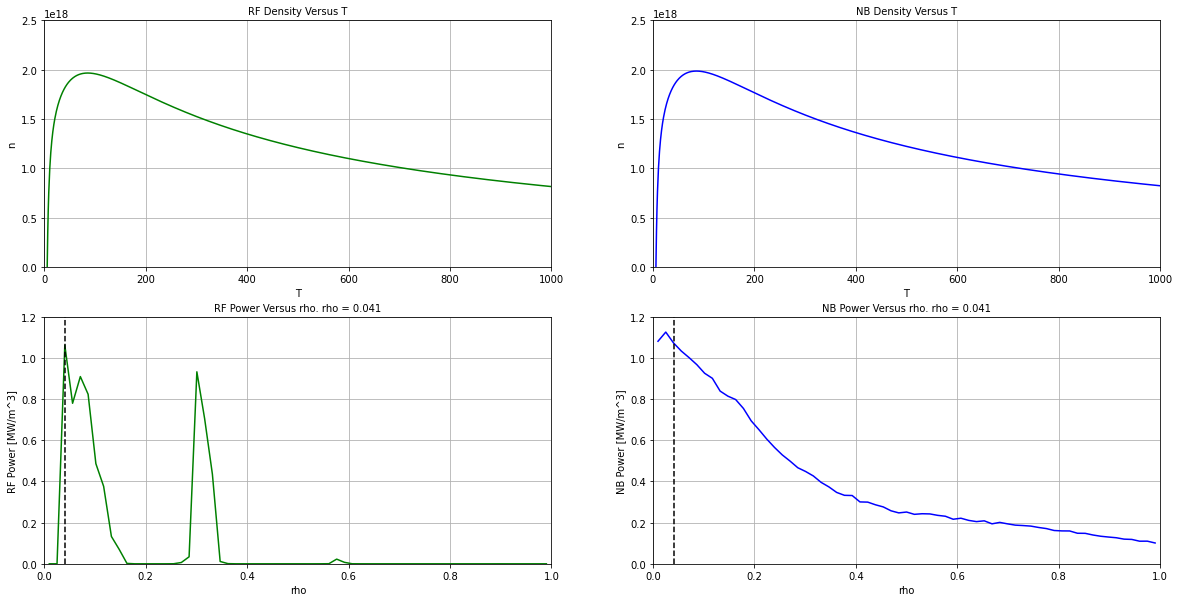

In [18]:
#########
# New Section for addressing the RF power partioning into density and temperature 
#########


# First, make a plot of n(T) for a given rho for NB and for RF 
Tfast_array = np.linspace(2, 1000, 1000)


fig, axs = plt.subplots(2, 2, figsize=(20, 10))


#axs[0].plot(rho, genray_density/1e19, color='red', linestyle='--')
axs[0,0].set_title('RF Density Versus T')
axs[0,1].set_title('NB Density Versus T')
# for rhoindex in range(genray_temps.shape[0]):
#     T = genray_temps[rhoindex]
#     n = genray_density[rhoindex]
#     powerRF = powers_RF[rhoindex]*1e6
#     powerNB = powers_NB[rhoindex]*1e6
#     nfastRF = get_n_from_T_P(Tfast_array, powerRF, Tk=T, n=n, Zb=1, mb=mD, mi=mD)
#     nfastNB = get_n_from_T_P(Tfast_array, powerNB, Tk=T, n=n, Zb=1, mb=mD, mi=mD)
#     axs[0].plot(Tfast_array, nfastRF, color='green', label='RF')
#     axs[1].plot(Tfast_array, nfastNB, color='blue', label='NB')


rhoindex = 2
T = genray_temps[rhoindex]
n = genray_density[rhoindex]
powerRF = powers_RF[rhoindex]*1e6
powerNB = powers_NB[rhoindex]*1e6
nfastRF = get_n_from_T_P(Tfast_array, powerRF, Tk=T, n=n, Zb=1, mb=mD, mi=mD)
nfastNB = get_n_from_T_P(Tfast_array, powerNB, Tk=T, n=n, Zb=1, mb=mD, mi=mD)
axs[0,0].plot(Tfast_array, nfastRF, color='green', label='RF')
axs[0, 1].plot(Tfast_array, nfastNB, color='blue', label='NB')

axs[0, 0].axis([0, 1000, 0, .25e19])
axs[0, 1].axis([0, 1000, 0, .25e19]) 
axs[0, 0].grid()
axs[0, 1].grid() 
axs[0, 0].set_xlabel('T')
axs[0, 1].set_xlabel('T')
axs[0, 0].set_ylabel('n')
axs[0, 1].set_ylabel('n')
axs[1,0].plot(rho, powers_RF, color='green')
axs[1, 0].set_ylabel('RF Power [MW/m^3]')
axs[1, 1].set_ylabel('NB Power [MW/m^3]')
axs[1,1].plot(rho, powers_NB, color='blue')
axs[1, 0].set_xlabel('rho')
axs[1, 1].set_xlabel('rho')
axs[1,0].grid()
axs[1,1].grid()
axs[1,0].axvline(x=rho[rhoindex], linestyle='--', color='black')
axs[1,1].axvline(x=rho[rhoindex], linestyle='--', color='black')
axs[1, 0].axis([0, 1, 0, 1.2])
axs[1, 1].axis([0, 1, 0, 1.2]) 
axs[1,0].set_title('RF Power Versus rho. rho = '+ str(round(rho[rhoindex], 3)))
axs[1,1].set_title('NB Power Versus rho. rho = '+ str(round(rho[rhoindex], 3)))


T3: 140.00000000005215
n3: 1.8898115446890483e+18
n1:  5.047519680621104
n2:  0.7076759905200151
n3:  0.18898115446890484
T1:  5.8346838563941175
T2:  17.77798364157695
T3:  140.00000000005215
T: 5.913273797232059
n:  5.991827061753982
nfastRF: 1.7479013919841347e+18
nfastNB:  1.4154660011596639e+18
()
Maxwellian total density:  5.047519521142743e+19
Maxwellian total density:  7.076759681624758e+18
Maxwellian total density:  1.747901336827154e+18


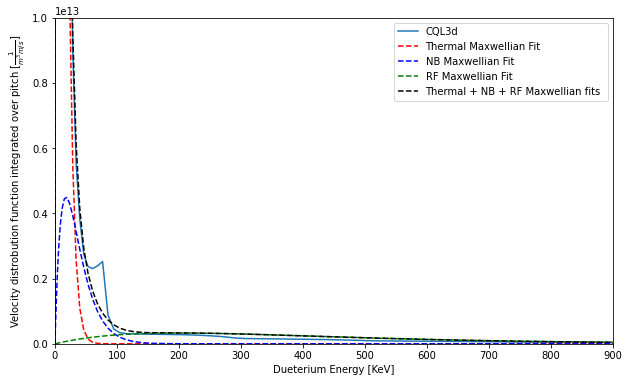

In [19]:
# Call the curve fitting function 
#rhoindex = 2
T = genray_temps[rhoindex]
n = genray_density[rhoindex]/1e19

powerRF = powers_RF[rhoindex]*1e6
powerNB = powers_NB[rhoindex]*1e6

# bounds = ([0, 0, 0, 2*T, 0, 80],[n*1.2, T*1.2, 0.15*n, 80, 0.15*n, 500])
# integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds)
n1L= 0
n1U = n

T1L = 0.8*T
T1U = 1.2*T

T2L = 1.5*T#4*T #1.5*T
T2U = 40

T3L = 140
T3U = 150


bounds2 = ([n1L, T1L, T2L, T3L],[n1U, T1U, T2U, T3U])
integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql2(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds2)

print('n1: ', n1)
print('n2: ', n2)
print('n3: ', n3)
print('T1: ', T1)
print('T2: ', T2)
print('T3: ', T3)

array_to_sort = np.array([[T1, T2, T3], [n1, n2, n3]])
sorted_array = array_to_sort[:, array_to_sort[0].argsort()]


T_th = sorted_array[0, 0]
T_NB = sorted_array[0, 1]
T_RF = 200  #sorted_array[0, 2]

n_th = sorted_array[1, 0]
n_NB = sorted_array[1, 1]
nfastRF = get_n_from_T_P(T_RF, powerRF, Tk=T, n=n*1e19, Zb=1, mb=mD, mi=mD)
nfastNB = get_n_from_T_P(T_NB, powerNB, Tk=T, n=n*1e19, Zb=1, mb=mD, mi=mD)
print('T:',T)
print('n: ', n)
print('nfastRF:',nfastRF)
print('nfastNB: ', nfastNB)
print(nfastRF.shape)
n_RF = nfastRF/1e19#sorted_array[1, 2]

# ----------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(enerkev, integrated_over_pitch, label='CQL3d')

max_energy_gridTH, max_TH = plot_maxwell_given_n_T_enerkev(n_th*1e19, T_th, enerkev, plotlog=False, color='red', label='Thermal Maxwellian Fit')
max_energy_gridNB, max_NB = plot_maxwell_given_n_T_enerkev(n_NB*1e19, T_NB, enerkev, plotlog=False, color='blue', label='NB Maxwellian Fit')
max_energy_gridRF, max_RF = plot_maxwell_given_n_T_enerkev(n_RF*1e19, T_RF, enerkev, plotlog=False, color='green', label='RF Maxwellian Fit')

# get_max_fvsqTH = interp1d(max_energy_gridTH, max_TH, kind='cubic')
# m_TH = get_max_fvsqTH(np.ma.getdata(enerkev))

# get_max_fvsqNB = interp1d(max_energy_gridNB, max_NB, kind='cubic')
# m_NB = get_max_fvsqNB(np.ma.getdata(enerkev))

# get_max_fvsqRF = interp1d(max_energy_gridRF, max_RF, kind='cubic')
# m_RF = get_max_fvsqRF(np.ma.getdata(enerkev))


plt.plot(enerkev,  max_TH + max_NB + max_RF, '--', label='Thermal + NB + RF Maxwellian fits ', color='black')
plt.xlabel('Dueterium Energy [KeV]')
plt.ylabel(r'Velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')
plt.xlim(0, 900)
plt.ylim(0, (1e13))
plt.legend()

In [ ]:
#########
# End section for power partitioning 
#########

In [20]:
# Create arrays to hold the thermal, neutral beam, and maxwellian profiles over rho

#~~~~~~~~~~~~~~~~~~
# MEAT AND POTATOS
#~~~~~~~~~~~~~~~~~
print(rho)
nth_array = np.zeros_like(rho)
nNB_array = np.zeros_like(rho)
nRF_array = np.zeros_like(rho)

Tth_array = np.zeros_like(rho)
TNB_array = np.zeros_like(rho)
TRF_array = np.zeros_like(rho)

integrated_over_pitch_array = np.zeros_like(rho).tolist()



[0.01      0.0253125 0.040625  0.0559375 0.07125   0.0865625 0.101875
 0.1171875 0.1325    0.1478125 0.163125  0.1784375 0.19375   0.2090625
 0.224375  0.2396875 0.255     0.2703125 0.285625  0.3009375 0.31625
 0.3315625 0.346875  0.3621875 0.3775    0.3928125 0.408125  0.4234375
 0.43875   0.4540625 0.469375  0.4846875 0.5       0.5153125 0.530625
 0.5459375 0.56125   0.5765625 0.591875  0.6071875 0.6225    0.6378125
 0.653125  0.6684375 0.68375   0.6990625 0.714375  0.7296875 0.745
 0.7603125 0.775625  0.7909375 0.80625   0.8215625 0.836875  0.8521875
 0.8675    0.8828125 0.898125  0.9134375 0.92875   0.9440625 0.959375
 0.9746875 0.99     ]


In [21]:
#--------------------------------------------------
# Call the curve fitting function 

for rhoindex in range(0, rho.shape[0]):
    print('rho: ', rhoindex)
    T = genray_temps[rhoindex]
    n = genray_density[rhoindex]/1e19
    # bounds = ([0, 0, 0, 2*T, 0, 80],[n*1.2, T*1.2, 0.15*n, 80, 0.15*n, 500])
    # bounds = ([0, 0, 0, 2*T, 0, 80],[n*1.2, T*1.2, 0.15*n, 80, 0.15*n, 3000])
    # integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds)

    # bounds = ([0, 0, 0, 2*T, 0, 80],[n*1.2, T*1.2, 0.15*n, 80, 0.15*n, 500])
    # integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds)
    n1L= 0
    n1U = n

    T1L = 0.8*T
    T1U = 1.2*T

    T2L = 4*T #1.5*T
    T2U = 40

    T3L = 149.9
    T3U = 150
    bounds2 = ([n1L, T1L, T2L, T3L],[n1U, T1U, T2U, T3U])#([0, 0.8*T, 2*T, 80],[n, T*1.2, 80, 500])
    integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql2(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds2)
    array_to_sort = np.array([[T1, T2, T3], [n1, n2, n3]])
    sorted_array = array_to_sort[:, array_to_sort[0].argsort()]

    # Load up this rho index's density and temperature values
    T_th = T1#sorted_array[0, 0]
    T_NB = T2#sorted_array[0, 1]
    T_RF = T3#sorted_array[0, 2]

    n_th = n1#sorted_array[1, 0]
    n_NB = n2#sorted_array[1, 1]
    n_RF = n3#sorted_array[1, 2]

    nth_array[rhoindex] = n_th
    nNB_array[rhoindex] = n_NB
    nRF_array[rhoindex] = n_RF

    Tth_array[rhoindex] = T_th
    TNB_array[rhoindex] = T_NB
    TRF_array[rhoindex] = T_RF

    integrated_over_pitch_array[rhoindex] = integrated_over_pitch

# ----------------------------------------------------

rho:  0
T3: 149.999999985
n3: 0.0
rho:  1
T3: 149.999999985
n3: 0.0
rho:  2
T3: 149.99999999999997
n3: 1.8674567380676114e+18
rho:  3
T3: 149.99999999999997
n3: 1.3704880075968842e+18
rho:  4
T3: 149.99999999999997
n3: 1.5976039968878356e+18
rho:  5
T3: 149.99999999999997
n3: 1.4455190295362593e+18
rho:  6
T3: 149.99999999999997
n3: 8.528276876481088e+17
rho:  7
T3: 149.99999999999997
n3: 6.587813726562977e+17
rho:  8
T3: 149.99999999999997
n3: 2.3214985804334246e+17
rho:  9
T3: 149.99999999999997
n3: 1.2260627292592678e+17
rho:  10
T3: 149.99999999999997
n3: 3346314497308567.5
rho:  11
T3: 149.99999999999997
n3: 13527775519294.709
rho:  12
T3: 149.99999999999997
n3: 6382411824.54238
rho:  13
T3: 149.99999999999997
n3: 706330884.8116019
rho:  14
T3: 149.99999999999997
n3: 6055739410.474427
rho:  15
T3: 149.99999999999997
n3: 2367432934018.35
rho:  16
T3: 149.99999999999997
n3: 420890511018317.3
rho:  17
T3: 149.99999999999997
n3: 1.0672418220808566e+16
rho:  18
T3: 149.99999999999997
n

Given rho:  0.5
rhoindex:  3
Found rho:  0.0559375
n_th:  5.07245894721892 x10^19 m^-3
n_NB:  0.7649760298467764 x10^19 m^-3
n_RF:  0.13704880075968842 x10^19 m^-3
T_th:  5.862667819660912 [KeV]
T_NB:  23.601851078204614 [KeV]
T_RF:  149.99999999999997 [KeV]
Maxwellian total density:  5.072458786952646e+19
Maxwellian total density:  7.649760056798558e+18
Maxwellian total density:  1.3704879643357722e+18


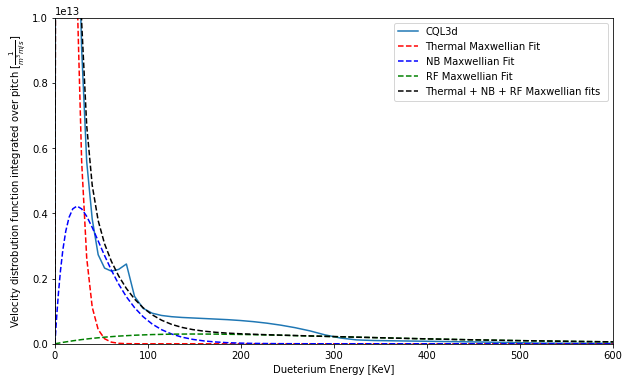

In [22]:
# plot a distrobution function reconstruction at a given rho
rho_i = 0.5

rhoindex= 3  # = np.where(rho - rho_i == min(np.abs(rho-rho_i)))[0][0]
print('Given rho: ', rho_i)
print('rhoindex: ', rhoindex)
print('Found rho: ', rho[rhoindex])

# calculate the temp and density at this location 
T_th = Tth_array[rhoindex]
T_NB = TNB_array[rhoindex]
T_RF = TRF_array[rhoindex]

n_th = nth_array[rhoindex]
n_NB = nNB_array[rhoindex]
n_RF = nRF_array[rhoindex]

print('n_th: ', n_th, 'x10^19 m^-3')
print('n_NB: ', n_NB, 'x10^19 m^-3')
print('n_RF: ', n_RF, 'x10^19 m^-3')
print('T_th: ', T_th, '[KeV]')
print('T_NB: ', T_NB, '[KeV]')
print('T_RF: ', T_RF, '[KeV]')

# get the cql solution 
integrated_over_pitch = integrated_over_pitch_array[rhoindex]

plt.figure(figsize=(10,6))
plt.plot(enerkev, integrated_over_pitch, label='CQL3d')

max_energy_gridTH, max_TH = plot_maxwell_given_n_T_enerkev(n_th*1e19, T_th, enerkev, plotlog=False, color='red', label='Thermal Maxwellian Fit')
max_energy_gridNB, max_NB = plot_maxwell_given_n_T_enerkev(n_NB*1e19, T_NB, enerkev, plotlog=False, color='blue', label='NB Maxwellian Fit')
max_energy_gridRF, max_RF = plot_maxwell_given_n_T_enerkev(n_RF*1e19, T_RF, enerkev, plotlog=False, color='green', label='RF Maxwellian Fit')


plt.plot(enerkev,  max_TH + max_NB + max_RF, '--', label='Thermal + NB + RF Maxwellian fits ', color='black')
plt.xlabel('Dueterium Energy [KeV]')
plt.ylabel(r'Velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')
plt.xlim(0, 600)
plt.ylim(0, (1e13))
plt.legend()

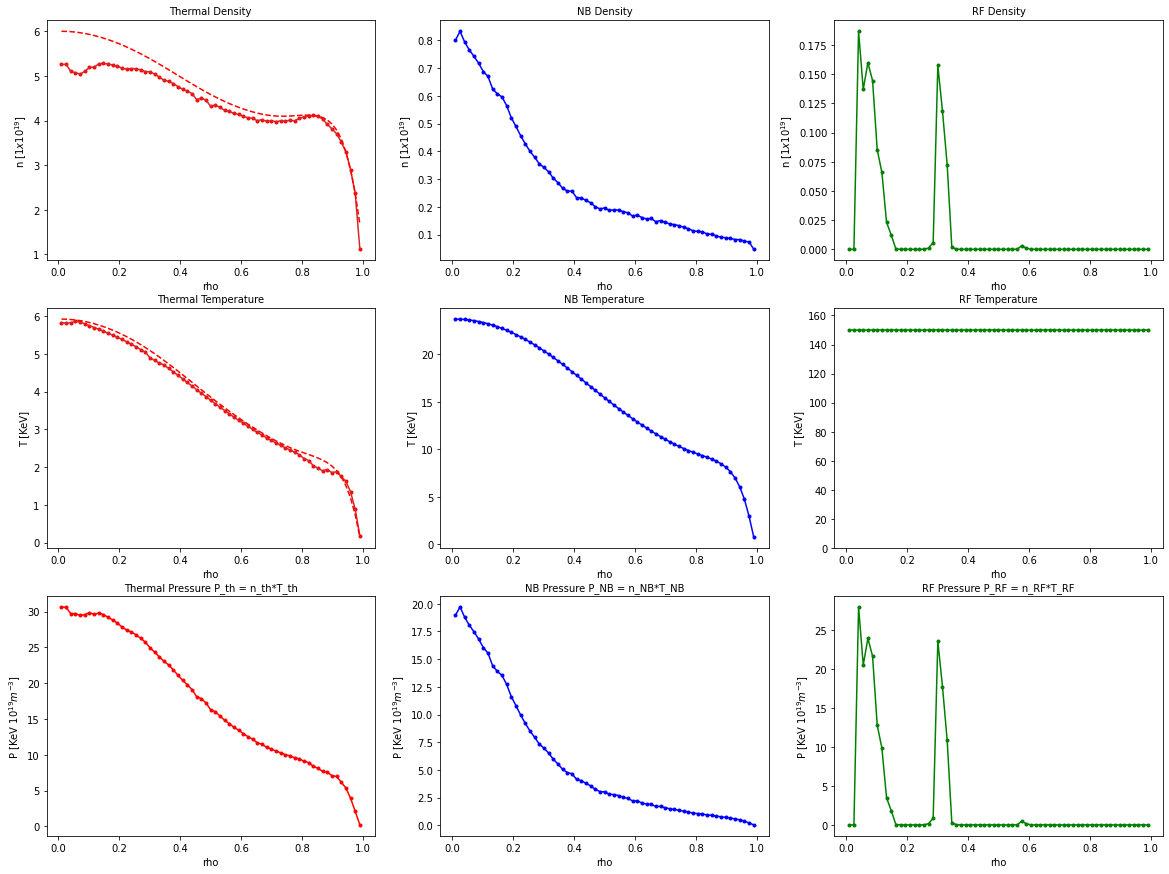

In [23]:
# plot the thermal, neutral beam, and RF density and temperature 
factor1 = 1
fig, axs = plt.subplots(3, 3, figsize=(20*factor1, 15*factor1))
axs[0, 0].plot(rho, nth_array, 'tab:red')
axs[0, 0].scatter(rho, nth_array, color='red', marker='.')
axs[0, 0].plot(rho, genray_density/1e19, color='red', linestyle='--')
axs[0, 0].set_title('Thermal Density')
axs[0, 0].set_xlabel('rho')
axs[0, 0].set_ylabel(r'n $[1x10^{19}]$')

axs[1, 0].plot(rho, Tth_array, 'tab:red')
axs[1, 0].scatter(rho, Tth_array, color='red', marker='.')
axs[1, 0].plot(rho, genray_temps, color='red', linestyle='--')
axs[1, 0].set_title('Thermal Temperature')
axs[1, 0].set_xlabel('rho')
axs[1, 0].set_ylabel('T [KeV]')

axs[0, 1].plot(rho, nNB_array, color='blue')
axs[0, 1].scatter(rho, nNB_array, color='blue', marker='.')
axs[0, 1].set_title('NB Density')
axs[0, 1].set_xlabel('rho')
axs[0, 1].set_ylabel(r'n $[1x10^{19}]$')

axs[1, 1].plot(rho, TNB_array, color='blue')
axs[1, 1].scatter(rho, TNB_array, color='blue', marker='.')
axs[1, 1].set_title('NB Temperature')
axs[1, 1].set_xlabel('rho')
axs[1, 1].set_ylabel('T [KeV]')

axs[0, 2].plot(rho, nRF_array, color='green')
axs[0, 2].scatter(rho, nRF_array, color='green', marker='.')
axs[0, 2].set_title('RF Density')
axs[0, 2].set_xlabel('rho')
axs[0, 2].set_ylabel(r'n $[1x10^{19}]$')

axs[1, 2].plot(rho, TRF_array, color='green')
axs[1, 2].scatter(rho, TRF_array, color='green', marker='.')
axs[1, 2].set_title('RF Temperature')
axs[1, 2].set_xlabel('rho')
axs[1, 2].set_ylabel('T [KeV]')
axs[1, 2].set_ylim(0, T3U*1.1)

axs[2, 0].plot(rho, Tth_array*nth_array, color='red')
axs[2, 0].scatter(rho, Tth_array*nth_array, color='red', marker='.')
axs[2, 0].set_title('Thermal Pressure P_th = n_th*T_th')
axs[2, 0].set_xlabel('rho')
axs[2, 0].set_ylabel(r'P [KeV $10^{19}m^{-3}$]')

axs[2, 1].plot(rho, TNB_array*nNB_array, color='blue')
axs[2, 1].scatter(rho, TNB_array*nNB_array, color='blue', marker='.')
axs[2, 1].set_title('NB Pressure P_NB = n_NB*T_NB')
axs[2, 1].set_xlabel('rho')
axs[2, 1].set_ylabel(r'P [KeV $10^{19}m^{-3}$]')

axs[2, 2].plot(rho, TRF_array*nRF_array, color='green')
axs[2, 2].scatter(rho, TRF_array*nRF_array, color='green', marker='.')
axs[2, 2].set_title('RF Pressure P_RF = n_RF*T_RF')
axs[2, 2].set_xlabel('rho')
axs[2, 2].set_ylabel(r'P [KeV $10^{19}m^{-3}$]')
plt.show()
# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

Total RF power to ions:  0.6963 MW
Total NB power to ions:  4.7337 MW


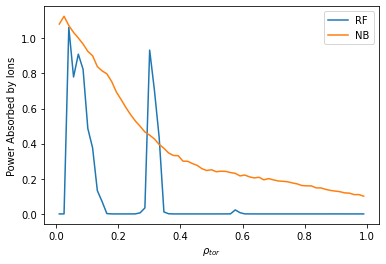

In [24]:
# Get the RF and NB power deposition to ions versus rho 
plt.plot(rya, powers_RF, label='RF')
plt.plot(rya, powers_NB, label='NB')

total_RF_power_to_ions = np.trapz(powers_RF*dvol*(1/100)**3)
total_NB_power_to_ions = np.trapz(powers_NB*dvol*(1/100)**3)
print('Total RF power to ions: ', np.round(total_RF_power_to_ions, 4), 'MW')
print('Total NB power to ions: ', np.round(total_NB_power_to_ions, 4), 'MW')
plt.ylabel('Power Absorbed by Ions')
plt.xlabel(r'$\rho_{tor}$')
plt.legend()

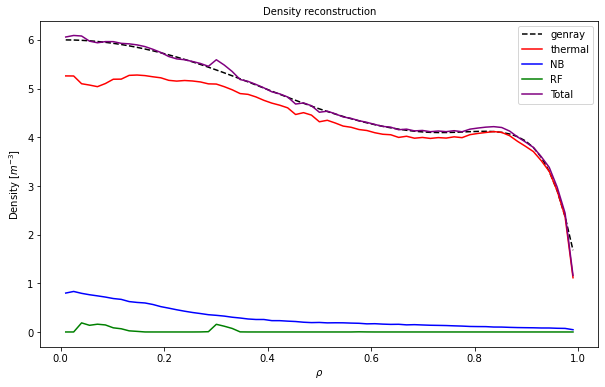

In [26]:
plt.figure(figsize=(10,6))
plt.plot(rho, genray_density/1e19, color='black', linestyle='--', label='genray')
plt.plot(rho, nth_array, color='red', label='thermal')
plt.plot(rho, nNB_array, color='blue', label='NB')
plt.plot(rho, nRF_array, color='green', label='RF')
plt.plot(rho, nth_array + nNB_array + nRF_array, color='purple', label='Total')
plt.title('Density reconstruction')
plt.xlabel(r'$\rho$')
plt.ylabel(r'Density [$m^{-3}$]')
plt.legend()

<ipython-input-27-581aaa97cd83>:5: RuntimeWarning: overflow encountered in exp
  return h*np.exp(-(rho-shift)**2/w)


h1:  0.5294972237968475
w1:  2.937870131200321e-05
shift1:  0.04692886190898966
h2:  0.15572987000498703
w2:  0.0012726897725059097
shift2:  0.07871007662961836
h3:  9.39641068748913e-07
w3:  9.044394071065427e-05
shift3:  0.49947095983752404


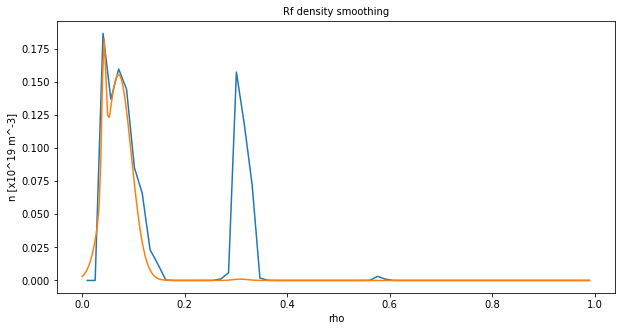

In [27]:
# Post-processing the reconstruction 
# Fit guassians to the RF density profile 
rho_fine = np.linspace(0, 0.99, 300)
def guasfit(rho, h, w, shift):
    return h*np.exp(-(rho-shift)**2/w)

def three_guasfits(rho, h1, w1, shift1, h2, w2, shift2, h3, w3, shift3):
    return guasfit(rho, h1, w1, shift1) + guasfit(rho, h2, w2, shift2) + guasfit(rho, h3, w3, shift3)

popt = curve_fit(three_guasfits, rho, nRF_array, p0=[.15, .0002, .04, .14, .0006, .07,  .0001, .0002, .5])
h1 = popt[0][0]
w1 = popt[0][1]
shift1 = popt[0][2]

h2 = popt[0][3]
w2 = popt[0][4]
shift2 = popt[0][5]

h3 = popt[0][6]
w3 = popt[0][7]
shift3 = popt[0][8]

plt.figure(figsize=(10,5))
plt.plot(rho, nRF_array)
# plt.plot(rho_fine, three_guasfits(rho_fine, h1, w1, shift1, h2, w2, shift2, h3, w3, shift3))
# plt.plot(rho_fine, guasfit(rho_fine, .15, w=.0002, shift=.04)+guasfit(rho_fine, .14, w=.0006, shift=.07))
print('h1: ', h1)
print('w1: ', w1)
print('shift1: ', shift1)
print('h2: ', h2)
print('w2: ', w2)
print('shift2: ', shift2)
print('h3: ', h3)
print('w3: ', w3)
print('shift3: ', shift3)
plt.xlabel('rho')
plt.ylabel('n [x10^19 m^-3]')
plt.title('Rf density smoothing')

nRF_tosave_metric = 1e19*three_guasfits(rho_fine, h1=.1, w1=w1, shift1=.9*shift1, h2=h2, w2=w2, shift2=.9*shift2, h3=.001, w3=.0004, shift3=.309)
plt.plot(rho_fine, nRF_tosave_metric/1e19)
TRF_tosave_kev = 150*(nRF_tosave_metric/nRF_tosave_metric)

Text(0.5, 1.0, 'NB density smoothing')

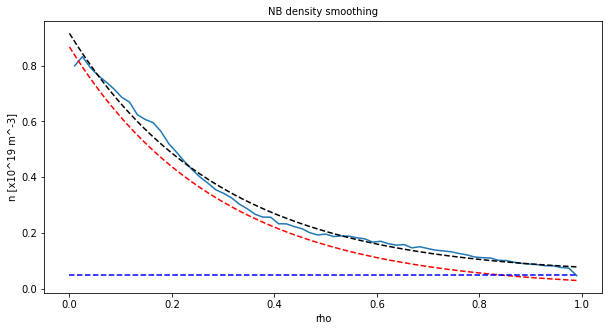

In [28]:
# NB Area
plt.figure(figsize=(10,5))
plt.plot(rho, nNB_array)

def NB_exp_fit(rho, h, d):
    return h*np.exp(-rho/d)

def two_NB_exp_fit(rho, h1, d1, h2, d2):
    return NB_exp_fit(rho, h1, d1) + NB_exp_fit(rho, h2, d2) 


h1=.3
d1 =.1
h2=.6
d2=.5
popt = curve_fit(two_NB_exp_fit, rho, nNB_array, p0=[h1, d1, h2, d2])
h1=popt[0][0]
d1 =popt[0][1]
h2=popt[0][2]
d2=popt[0][3]

plt.plot(rho_fine, two_NB_exp_fit(rho_fine, h1=h1, d1=d1, h2=h2, d2=d2), 'k--')
plt.plot(rho_fine, NB_exp_fit(rho_fine, h=h1, d=d1), 'r--')
plt.plot(rho_fine, NB_exp_fit(rho_fine, h=h2, d=d2), 'b--')
plt.xlabel('rho')

nNB_tosave_metric = 1e19*two_NB_exp_fit(rho_fine, h1=h1, d1=d1, h2=h2, d2=d2)
plt.ylabel('n [x10^19 m^-3]')
plt.title('NB density smoothing')


Text(0.5, 1.0, 'NB Temperature smoothing')

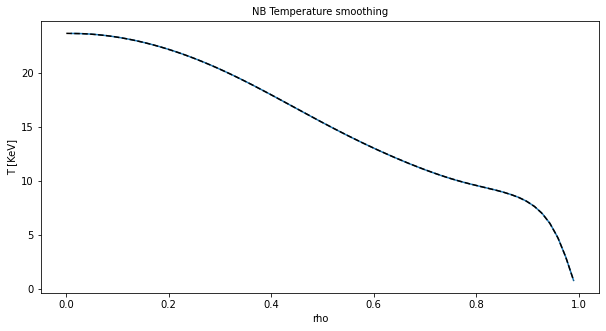

In [29]:
# NB temperature 
plt.figure(figsize=(10,5))
plt.plot(rho, TNB_array)

from scipy.interpolate import interp1d
TNB_tosave_kev = interp1d(rho, TNB_array, fill_value="extrapolate")(rho_fine)
plt.plot(rho_fine, TNB_tosave_kev, 'k--')
plt.xlabel('rho')
plt.ylabel('T [KeV]')
plt.title('NB Temp smoothing')
#plt.plot(rho_fine, 0*TNB_tosave_kev, 'k--')
plt.ylabel('T [KeV]')
plt.title('NB Temperature smoothing')

Text(0.5, 1.0, 'Thermal density smoothing')

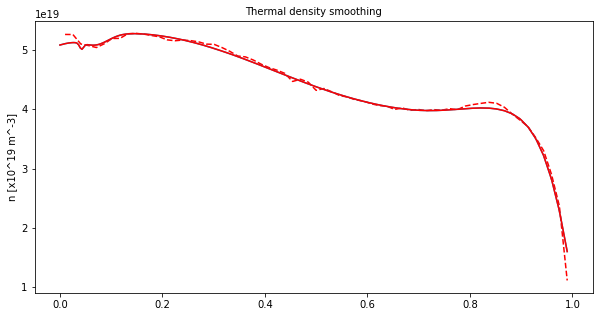

In [30]:
nth_baseline_noNBRF = interp1d(rho, genray_density, fill_value="extrapolate")(rho_fine)
plt.figure(figsize=(10,5))
plt.plot(rho, 1e19*nth_array, 'r--')
plt.plot(rho_fine, nth_baseline_noNBRF- nRF_tosave_metric - nNB_tosave_metric)
#plt.plot(rho_fine, nRF_tosave_metric + nNB_tosave_metric+nth_tosave_metric)
nth_tosave_metric = nth_baseline_noNBRF- nRF_tosave_metric - nNB_tosave_metric # conservation of particles 
plt.plot(rho_fine, nth_tosave_metric, color='red')
plt.ylabel('n [x10^19 m^-3]')
plt.title('Thermal density smoothing')

Text(0.5, 0, 'rho')

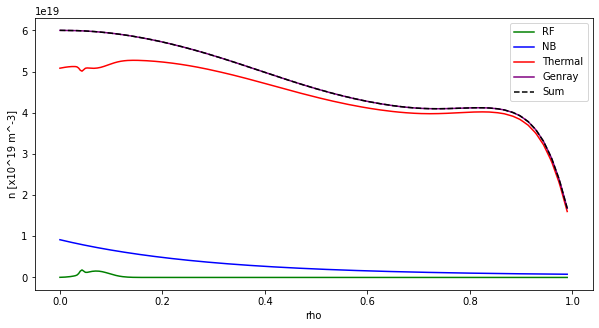

In [31]:
# sanity check for density 
plt.figure(figsize=(10,5))
plt.plot(rho_fine, nRF_tosave_metric, color='green', label='RF')
plt.plot(rho_fine, nNB_tosave_metric, color='blue', label='NB')
plt.plot(rho_fine, nth_tosave_metric, color='red', label='Thermal')
plt.plot(rho_fine, nth_baseline_noNBRF, color='purple', label='Genray')
plt.plot(rho_fine, nRF_tosave_metric + nNB_tosave_metric + nth_tosave_metric, label='Sum', color='black', linestyle='--')
plt.legend()
plt.ylabel('n [x10^19 m^-3]')
plt.xlabel('rho')

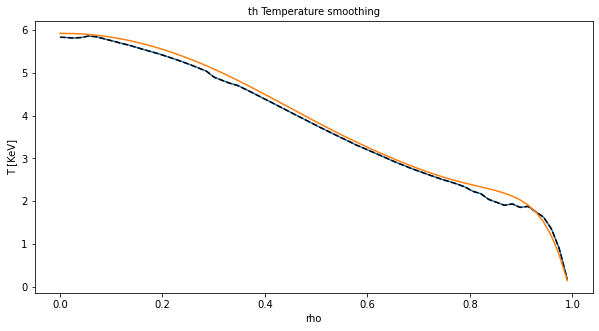

In [32]:
# thermal temperature smoothing 

plt.figure(figsize=(10,5))
plt.plot(rho, Tth_array)

from scipy.interpolate import interp1d
Tth_tosave_kev = interp1d(rho, Tth_array, fill_value="extrapolate")(rho_fine)
Te_tosave_kev = interp1d(rho, genray_temps, fill_value="extrapolate")(rho_fine)
plt.plot(rho_fine, Tth_tosave_kev, 'k--')
plt.xlabel('rho')
plt.ylabel('T [KeV]')
plt.title('th Temp smoothing')
#plt.plot(rho_fine, 0*TNB_tosave_kev, 'k--')
plt.ylabel('T [KeV]')
plt.title('th Temperature smoothing')
plt.plot(rho_fine, Te_tosave_kev)

Maxwellian total density:  5.023351105743989e+19
Maxwellian total density:  3.583556511026479e+18
Maxwellian total density:  8486776519074540.0


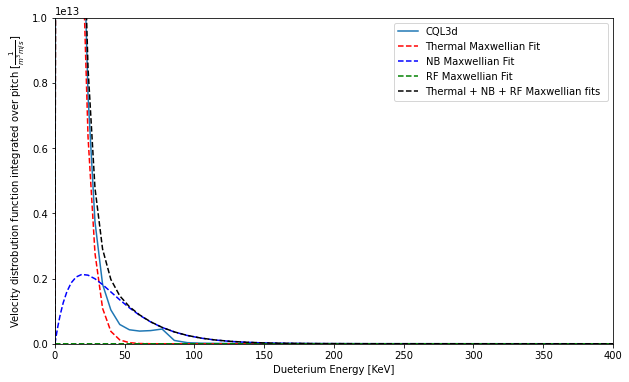

In [33]:
# check to see if it really is a good fit for the distrobution functions
rhoindex = 19

Tth = interp1d(rho_fine, Tth_tosave_kev)(rho[rhoindex])
TNB = interp1d(rho_fine, TNB_tosave_kev)(rho[rhoindex])
TRF = 150

nth = interp1d(rho_fine, nth_tosave_metric)(rho[rhoindex])/1e19
nNB = interp1d(rho_fine, nNB_tosave_metric)(rho[rhoindex])/1e19
nRF = interp1d(rho_fine, nRF_tosave_metric)(rho[rhoindex])/1e19

integrated_over_pitch = integrated_over_pitch_array[rhoindex]

plt.figure(figsize=(10,6))
plt.plot(enerkev, integrated_over_pitch, label='CQL3d')

max_energy_gridTH, max_TH = plot_maxwell_given_n_T_enerkev(nth*1e19, Tth, enerkev, plotlog=False, color='red', label='Thermal Maxwellian Fit')
max_energy_gridNB, max_NB = plot_maxwell_given_n_T_enerkev(nNB*1e19, TNB, enerkev, plotlog=False, color='blue', label='NB Maxwellian Fit')
max_energy_gridRF, max_RF = plot_maxwell_given_n_T_enerkev(nRF*1e19, TRF, enerkev, plotlog=False, color='green', label='RF Maxwellian Fit')


plt.plot(enerkev,  max_TH + max_NB + max_RF, '--', label='Thermal + NB + RF Maxwellian fits ', color='black')
plt.xlabel('Dueterium Energy [KeV]')
plt.ylabel(r'Velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')
plt.xlim(0, 400)
plt.ylim(0, (1e13))
plt.legend()


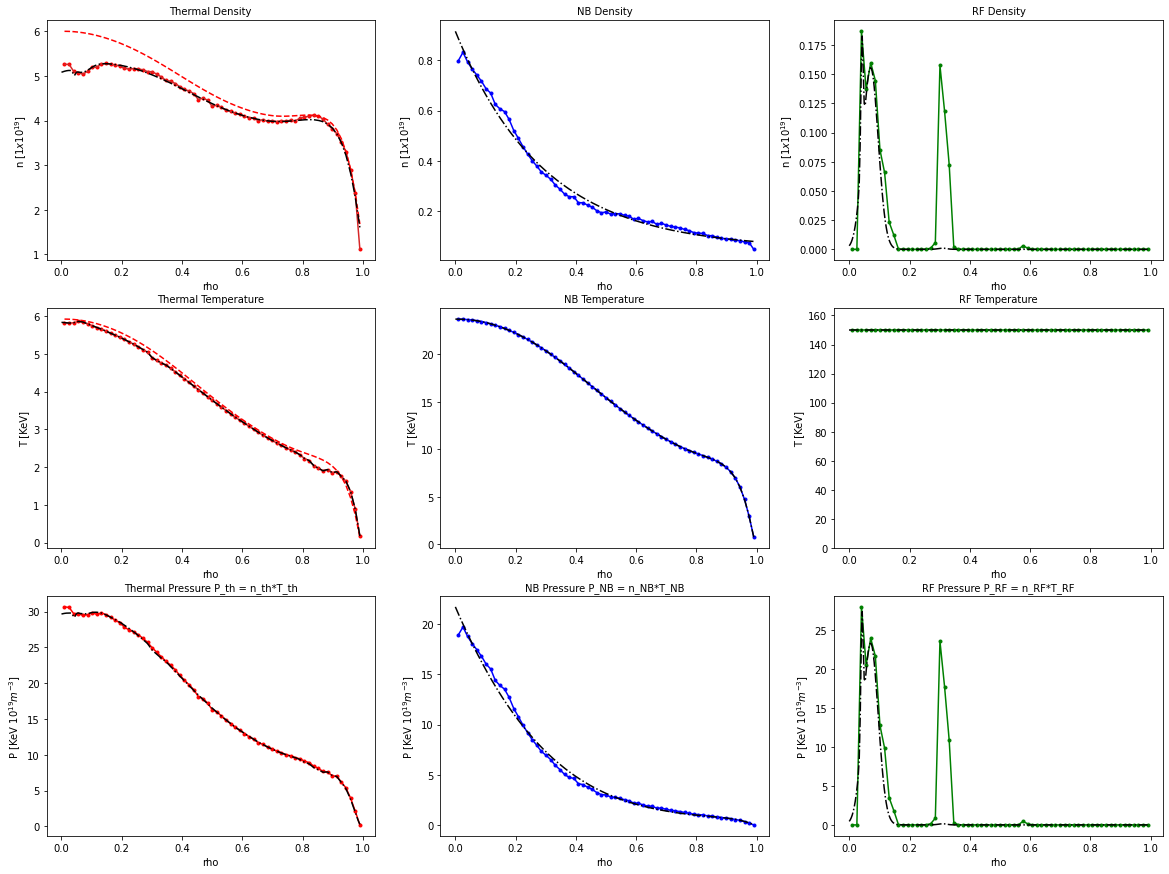

In [34]:
# plot the thermal, neutral beam, and RF density and temperature 
factor1 = 1
fig, axs = plt.subplots(3, 3, figsize=(20*factor1, 15*factor1))
axs[0, 0].plot(rho, nth_array, 'tab:red')
axs[0, 0].scatter(rho, nth_array, color='red', marker='.')
axs[0, 0].plot(rho, genray_density/1e19, color='red', linestyle='--')
axs[0, 0].plot(rho_fine, nth_tosave_metric/1e19, color='black', linestyle='dashdot')
axs[0, 0].set_title('Thermal Density')
axs[0, 0].set_xlabel('rho')
axs[0, 0].set_ylabel(r'n $[1x10^{19}]$')

axs[1, 0].plot(rho, Tth_array, 'tab:red')
axs[1, 0].scatter(rho, Tth_array, color='red', marker='.')
axs[1, 0].plot(rho, genray_temps, color='red', linestyle='--')
axs[1, 0].plot(rho_fine, Tth_tosave_kev, color='black', linestyle='dashdot')
axs[1, 0].set_title('Thermal Temperature')
axs[1, 0].set_xlabel('rho')
axs[1, 0].set_ylabel('T [KeV]')

axs[0, 1].plot(rho, nNB_array, color='blue')
axs[0, 1].scatter(rho, nNB_array, color='blue', marker='.')
axs[0, 1].plot(rho_fine, nNB_tosave_metric/1e19, color='black', linestyle='dashdot')
axs[0, 1].set_title('NB Density')
axs[0, 1].set_xlabel('rho')
axs[0, 1].set_ylabel(r'n $[1x10^{19}]$')

axs[1, 1].plot(rho, TNB_array, color='blue')
axs[1, 1].scatter(rho, TNB_array, color='blue', marker='.')
axs[1, 1].plot(rho_fine, TNB_tosave_kev, color='black', linestyle='dashdot')
axs[1, 1].set_title('NB Temperature')
axs[1, 1].set_xlabel('rho')
axs[1, 1].set_ylabel('T [KeV]')

axs[0, 2].plot(rho, nRF_array, color='green')
axs[0, 2].scatter(rho, nRF_array, color='green', marker='.')
axs[0, 2].plot(rho_fine, nRF_tosave_metric/1e19, color='black', linestyle='dashdot')
axs[0, 2].set_title('RF Density')
axs[0, 2].set_xlabel('rho')
axs[0, 2].set_ylabel(r'n $[1x10^{19}]$')

axs[1, 2].plot(rho, TRF_array, color='green')
axs[1, 2].scatter(rho, TRF_array, color='green', marker='.')
axs[1, 2].plot(rho_fine, TRF_tosave_kev, color='black', linestyle='dashdot')
axs[1, 2].set_title('RF Temperature')
axs[1, 2].set_xlabel('rho')
axs[1, 2].set_ylabel('T [KeV]')
axs[1, 2].set_ylim(0, T3U*1.1)

axs[2, 0].plot(rho, Tth_array*nth_array, color='red')
axs[2, 0].scatter(rho, Tth_array*nth_array, color='red', marker='.')
axs[2, 0].plot(rho_fine, Tth_tosave_kev*nth_tosave_metric/1e19, color='black', linestyle='dashdot')
axs[2, 0].set_title('Thermal Pressure P_th = n_th*T_th')
axs[2, 0].set_xlabel('rho')
axs[2, 0].set_ylabel(r'P [KeV $10^{19}m^{-3}$]')

axs[2, 1].plot(rho, TNB_array*nNB_array, color='blue')
axs[2, 1].scatter(rho, TNB_array*nNB_array, color='blue', marker='.')
axs[2, 1].plot(rho_fine, TNB_tosave_kev*nNB_tosave_metric/1e19, color='black', linestyle='dashdot')
axs[2, 1].set_title('NB Pressure P_NB = n_NB*T_NB')
axs[2, 1].set_xlabel('rho')
axs[2, 1].set_ylabel(r'P [KeV $10^{19}m^{-3}$]')

axs[2, 2].plot(rho, TRF_array*nRF_array, color='green')
axs[2, 2].scatter(rho, TRF_array*nRF_array, color='green', marker='.')
axs[2, 2].plot(rho_fine, TRF_tosave_kev*nRF_tosave_metric/1e19, color='black', linestyle='dashdot')
axs[2, 2].set_title('RF Pressure P_RF = n_RF*T_RF')
axs[2, 2].set_xlabel('rho')
axs[2, 2].set_ylabel(r'P [KeV $10^{19}m^{-3}$]')
plt.show()

In [35]:
rho_pol = np.loadtxt('../../rho_pol.txt')
rho_tor = np.loadtxt('../../rho_tor.txt')
qprof_pol = np.loadtxt('../../qprof_pol.txt')
from scipy.interpolate import PchipInterpolator


[0.         0.09589404 0.13687248 0.16910755 0.1968987  0.22186214
 0.24481056 0.2661985  0.28630637 0.30532336 0.32338792 0.34060644
 0.35705222 0.3727946  0.38789206 0.40239032 0.41633556 0.42977179
 0.44273869 0.45527617 0.46742471 0.47922482 0.49071406 0.50192772
 0.51289976 0.52366176 0.53424323 0.54466928 0.55496287 0.56514628
 0.57524011 0.58526361 0.59523446 0.60516939 0.6150844  0.62499521
 0.63491712 0.64486523 0.65485499 0.66490105 0.67501803 0.68522141
 0.69552766 0.70595443 0.71651918 0.72723879 0.73813305 0.74922412
 0.76053399 0.77208549 0.78390375 0.79601973 0.80846537 0.82127457
 0.83448596 0.84814223 0.86228535 0.87695735 0.89220395 0.90806655
 0.92458142 0.94177624 0.9597124  0.97849873 1.        ]


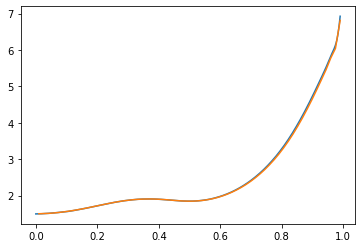

In [36]:
def convert(rho1,rho2,prof1):
    prof1fun = PchipInterpolator(rho1,prof1)
    rhoconvfun = PchipInterpolator(rho2,rho1)
    prof2 = prof1fun(rhoconvfun(rho2))
    prof2fun = PchipInterpolator(rho2,prof2)
    #assert np.all(prof1fun(rho1)-prof2fun(rho2) == 0)
    return prof2fun

map_tor_to_pol = PchipInterpolator(rho_tor, rho_pol)
map_pol_to_tor = PchipInterpolator(rho_pol, rho_tor)
qprof_tor = convert(rho_pol, rho_tor, qprof_pol)(rho_fine)
plt.plot(rho_fine, qprof_tor)
print(rho_tor)

rya = cql_nc.variables["rya"][:]
qProfileCQL3D = cql_nc.variables["qsafety"][:] 

plt.plot(rya, qProfileCQL3D)

[3.01969541e-03 4.32811706e-03 6.09751423e-03 8.44354089e-03
 1.14924961e-02 1.53752463e-02 2.02184496e-02 2.61335559e-02
 3.32227225e-02 4.19774079e-02 5.67639603e-02 9.30348983e-02
 1.53596056e-01 1.82670326e-01 1.53367234e-01 1.24769585e-01
 1.23168111e-01 1.31981421e-01 1.41015855e-01 1.48223321e-01
 1.53141742e-01 1.55520889e-01 1.55239361e-01 1.52311580e-01
 1.46886528e-01 1.39235178e-01 1.29728066e-01 1.18805592e-01
 1.06944334e-01 9.46229855e-02 8.22912153e-02 7.03441960e-02
 5.91045655e-02 4.88125788e-02 3.96241938e-02 3.16160123e-02
 2.47954336e-02 1.91141192e-02 1.44828767e-02 1.07863211e-02
 7.89604871e-03 5.68151631e-03 4.01824730e-03 2.79336077e-03
 1.90868984e-03 1.28192217e-03 8.46264103e-04 5.49121117e-04
 3.50225961e-04 2.19556597e-04 1.35289038e-04 8.19401380e-05
 4.87807800e-05 2.85442580e-05 1.64174890e-05 9.28138300e-06
 5.15746800e-06 2.81694600e-06 1.51230100e-06 7.98024000e-07
 4.13916000e-07 2.11021000e-07 1.05744000e-07 5.20840000e-08
 2.52160000e-08 1.200000

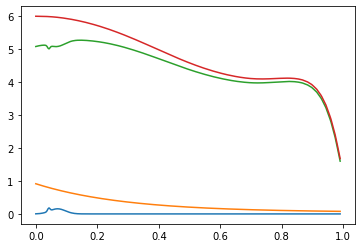

In [37]:
# print(nth_tosave_metric*(1/100)**3/1e13)
print(np.round(nRF_tosave_metric*(1/100)**3/1e13, 12))
plt.plot(rho_fine, np.round(nRF_tosave_metric*(1/100)**3/1e13, 12))
plt.plot(rho_fine, nNB_tosave_metric*(1/100)**3/1e13)
plt.plot(rho_fine, nth_tosave_metric*(1/100)**3/1e13)
plt.plot(rho_fine, (nth_tosave_metric + nNB_tosave_metric)*(1/100)**3/1e13 + np.round(nRF_tosave_metric*(1/100)**3/1e13, 12))

Text(0.5, 0, 'rho')

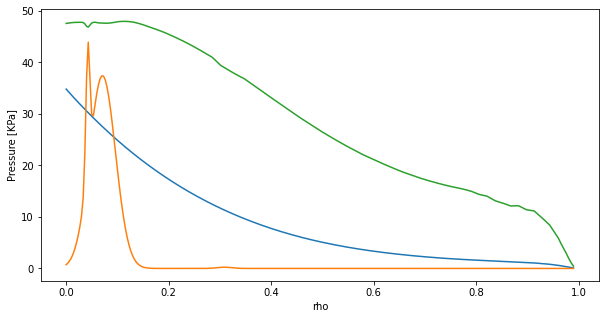

In [38]:
presfac = 1.6022e-19
plt.figure(figsize=(10, 5))
plt.plot(rho_fine, nNB_tosave_metric*TNB_tosave_kev*presfac)
plt.plot(rho_fine, nRF_tosave_metric*TRF_tosave_kev*presfac)
plt.plot(rho_fine, nth_tosave_metric*Tth_tosave_kev*presfac)
plt.ylabel('Pressure [KPa]')
plt.xlabel('rho')

dict_keys(['version', 'mnemonic', 'ampfmod', 'urfmod', 'rdcmod', 'frmod', 'beamplse', 'transp', 'tavg', 'f4d_out', 'netcdfshort', 'eqdskin', 'ngen', 'ntotal', 'kspeci', 'bnumb', 'fmass', 'lrzmax', 'radcoord', 'rya', 'Rp', 'Rm', 'rhomax', 'radmaj', 'rpmconz', 'btor', 'toteqd', 'rgeomp', 'r0geomp', 'rmag', 'zmag', 'eqsym', 'zshift', 'eps0', 'elong', 'zgeomp', 'rgeom1', 'rgeom2', 'area', 'darea', 'vol', 'dvol', 'equilpsi', 'psivalm', 'dpsi', 'psimag', 'psilim', 'h_r', 'qsafety', 'curreq', 'lrz', 'lrindx', 'jx', 'x', 'enerkev', 'uoc', 'dx', 'cint2', 'vnorm', 'enorm', 'iy', 'y', 'dy', 'cynt2', 'iy_', 'itl', 'itu', 'lz', 'z', 'dz', 'solrz', 'solzz', 'pol', 'bbpsi', 'imax', 'lmax', 'zboun', 'zmaxpsi', 'tau', 'dtau', 'beampon', 'beampoff', 'tavg1', 'tavg2', 'ndeltarho', 'bthr', 'btoru', 'btor0', 'bmidplne', 'efflag', 'softxry', 'ipronn', 'gamafac', 'pellet', 'imp_type', 'nstates', 'fmass_imp', 'pellet_M0', 'pellet_Cablation', 'npa_diag', 'sigmamod', 'time', 'bctshift', 'bctimescal', 'nsave', '

Text(0.5, 0, '$\\rho_{tor}$')

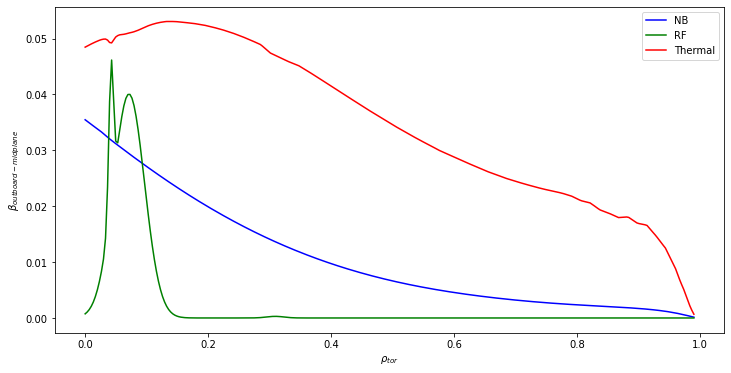

In [58]:
print(cql_nc.variables.keys())
bmidpln = cql_nc.variables['bmidplne'][:] / 10000
mu0 = 4*np.pi*1e-7
plt.figure(figsize=(12,6))
bmidpln_fine = interp1d(rho, bmidpln, fill_value="extrapolate")(rho_fine)
betaNB = nNB_tosave_metric*TNB_tosave_kev*presfac*1000 / (bmidpln_fine**2/(2*mu0))
betaRF = nRF_tosave_metric*TRF_tosave_kev*presfac*1000 / (bmidpln_fine**2/(2*mu0))
betath = nth_tosave_metric*Tth_tosave_kev*presfac*1000 / (bmidpln_fine**2/(2*mu0))
plt.plot(rho_fine, betaNB, color='blue', label='NB')
plt.plot(rho_fine, betaRF, color='green', label='RF')
plt.plot(rho_fine, betath, color='red', label='Thermal')
plt.legend()
plt.ylabel(r'$\beta_{outboard-midplane}$')
plt.xlabel(r'$\rho_{tor}$')

In [335]:
# write to txt file in format 

titles_original = ['Rho(norml. sqrt. toroid. flux)',
             'q', 
             'Beam Ion Density(10^13 cm^-3)', 
             'Ion Density(10^13 cm^-3)', 
             'Elec Density(10^13 cm^-3)', 
             'Impurity Density(10^13 cm^-3)', 
             'Beam Ion Effective Temp(keV)', 
             'Ion Temp(keV)', 
             'Electron Temp(keV)',
             'Beam Pressure(kPa)', 
             'Thermal Pressure(kPa)', 
             'Equil.Pressure(kPa)', 
             'Zeff', 
             'Tor Rot(kHz)', 
             'Tor Rot(10^5 m/s)']

titles_jacob = ['Rho(norml. sqrt. toroid. flux)',
             'q', 
             'Beam Ion Density(10^13 cm^-3)',
             'RF Ion Density(10^13 cm^-3)',
             'Ion Density(10^13 cm^-3)', 
             'Elec Density(10^13 cm^-3)',
             'Beam Ion Effective Temp(keV)',
             'RF Ion Effective Temp(keV)',
             'Ion Temp(keV)', 
             'Electron Temp(keV)',
             ]
savemat = np.zeros((rho_fine.shape[0], len(titles_original)))

savemat[:, 0] = rho_fine  # Rho
savemat[:, 1] = qprof_tor  # q
savemat[:, 3] = nNB_tosave_metric*(1/100)**3/1e13  # Beam Ion Density convert to 10^13 cm^-3
savemat[:, 4] = np.round(nRF_tosave_metric*(1/100)**3/1e13, 12)  # RF Ion Density convert to 10^13 cm^-3 and round to 12 decimal points
savemat[:, 5] = nth_tosave_metric*(1/100)**3/1e13  # Ion Density convert to 10^13 cm^-3
savemat[:, 6] = (nth_tosave_metric + nNB_tosave_metric)*(1/100)**3/1e13 + np.round(nRF_tosave_metric*(1/100)**3/1e13, 12) # Elec Density convert to 10^13 cm^-3
savemat[:, 7] =  TNB_tosave_kev #Beam Ion Effective Temp
savemat[:, 8] = TRF_tosave_kev #RF Ion Effective Temp
savemat[:, 9] = Tth_tosave_kev#'Ion Temp(keV)', 
savemat[:, 10] = Te_tosave_kev #'Electron Temp(keV)',


n_th:  5.269314775491303
T_th:  5.42626913395064 

n_NB:  0.2599616741853274
T_NB:  24.55214237039264 

n_RF:  1.7545251460640842e-13
T_RF:  199.99999999999997 

Maxwellian total density:  5.269314609004382e+19
Maxwellian total density:  2.599616659727365e+18
Maxwellian total density:  1754525.0906980836


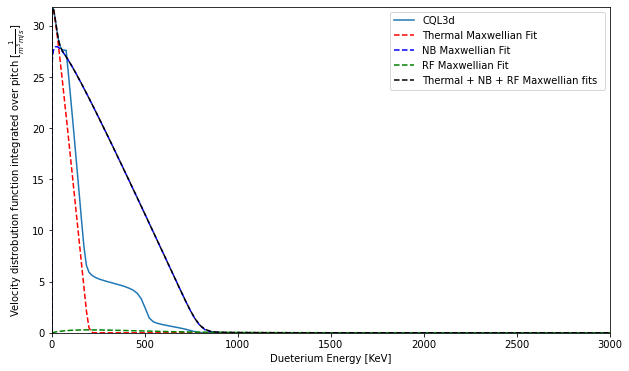

In [24]:
# rhoindex = 14
# T = genray_temps[rhoindex]
# n = genray_density[rhoindex]/1e19
# bounds = ([0, 0, 0, 3*T, 0, 80],[n*1.2, T*1.2, 0.15*n, 4.5*T, 0.15*n, 200])
# integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds)

# array_to_sort = np.array([[T1, T2, T3], [n1, n2, n3]])
# sorted_array = array_to_sort[:, array_to_sort[0].argsort()]

# # Load up this rho index's density and temperature values
# T_th = sorted_array[0, 0]
# T_NB = sorted_array[0, 1]
# T_RF = sorted_array[0, 2]

# n_th = sorted_array[1, 0]
# n_NB = sorted_array[1, 1]
# n_RF = sorted_array[1, 2]

# # nth_array[rhoindex] = n_th
# # nNB_array[rhoindex] = n_NB
# # nRF_array[rhoindex] = n_RF

# # Tth_array[rhoindex] = T_th
# # TNB_array[rhoindex] = T_NB
# # TRF_array[rhoindex] = T_RF
# print('n_th: ', n_th)
# print('T_th: ', T_th, '\n')
# print('n_NB: ', n_NB)
# print('T_NB: ', T_NB, '\n')
# print('n_RF: ', n_RF)
# print('T_RF: ', T_RF, '\n')
# # ----------------------------------------------------
# plotlog = True
# max_yrange = 7e13# 0.7e13 # 7e13
# max_xrange = 3000
# plt.figure(figsize=(10,6))
# if plotlog:
#     plt.plot(enerkev, np.log(1+integrated_over_pitch), label='CQL3d')
# else:
#     plt.plot(enerkev, (integrated_over_pitch), label='CQL3d')

# max_energy_gridTH, max_TH = plot_maxwell_given_n_T_enerkev(n_th*1e19, T_th, enerkev, plotlog=plotlog, color='red', label='Thermal Maxwellian Fit')
# max_energy_gridNB, max_NB = plot_maxwell_given_n_T_enerkev(n_NB*1e19, T_NB, enerkev, plotlog=plotlog, color='blue', label='NB Maxwellian Fit')
# max_energy_gridRF, max_RF = plot_maxwell_given_n_T_enerkev(n_RF*1e19, T_RF, enerkev, plotlog=plotlog, color='green', label='RF Maxwellian Fit')

# if plotlog:
#     plt.plot(enerkev,  np.log(1+max_TH + max_NB + max_RF), '--', label='Thermal + NB + RF Maxwellian fits ', color='black')
# else:
#     plt.plot(enerkev,  max_TH + max_NB + max_RF, '--', label='Thermal + NB + RF Maxwellian fits ', color='black')

# plt.xlabel('Dueterium Energy [KeV]')
# plt.ylabel(r'Velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')
# plt.xlim(0, max_xrange)
# if plotlog:
#     plt.ylim(0, np.log(max_yrange))
# else:
#     plt.ylim(0, (max_yrange))

# plt.legend()

In [29]:
# #------------------------------
# # Not really used
# #------------------------------



# # new area to test out Yuri's fix.
# M = 3.343e-27
# vnorm = np.ma.getdata(cql_nc.variables['vnorm'])
# cint2 = cql_nc.variables['cint2']
# x_squared_dx = np.ma.getdata(cint2)
# cynt2 = cql_nc.variables['cynt2']
# normalizedVel = np.ma.getdata(cql_nc.variables['x'][:])
# two_pi_siny_dy = np.ma.getdata(cynt2)  # note that the pitch angle mesh depends on the radial location 

# print(x_squared_dx.shape)
# print(two_pi_siny_dy.shape) 

# rhoindex = 4

# ff = f[0]
# print(ff.shape)

# integrated_over_pitch = np.trapz(ff[rhoindex, :]*two_pi_siny_dy[rhoindex], axis=1)
# density = np.trapz(integrated_over_pitch*x_squared_dx)
# print(r'The desnity at rho = ', rhoIndex, ' is ', 1e6*density/1e19, r' m^-3')
# #---------------
# density_at_energy = np.zeros(normalizedVel.shape[0])
# energyCenters = (enerkev[1:] + enerkev[:-1])/2
# for velIndex in range(len(normalizedVel)-1):
#     #this is the radial part of the spherical jacobian
#     densityLower = np.ma.getdata(np.trapz(integrated_over_pitch[:velIndex]*x_squared_dx[:velIndex]))
#     densityUpper = np.ma.getdata(np.trapz(integrated_over_pitch[:velIndex+1]*x_squared_dx[:velIndex+1]))

#     if velIndex == 0:
#         density_at_energy[velIndex] = densityUpper
#         continue

#     diff = densityUpper - densityLower

#     density_at_energy[velIndex] = diff

# #---------------
# velocity_array = normalizedVel*vnorm/100 # this is in SI
# vslice = 120
# print(integrated_over_pitch.shape)
# print(density*1e6)
# #plt.plot(normalizedVel[:100]*vnorm/100, 1e6*density_at_energy[:100]/fac)
# plt.figure(figsize=(10,6))
# #plt.plot(velocity_array[:vslice], 1e6*integrated_over_pitch[:vslice]*normalizedVel[:vslice]**2*(1/vnorm)*100)
# plt.plot(enerkev[:vslice], (1e6*integrated_over_pitch[:vslice]*normalizedVel[:vslice]**2*(1/vnorm)*100+1), label='CQL3d')

# # Get thee 
# n_rho = genray_density[rhoindex]
# T_rho = genray_temps[rhoindex]
# max_energy_grid, max_fvsquared = plot_maxwell_given_n_T_enerkev(n_rho, T_rho, enerkev, plotlog=False, color='red', label='Thermal Maxwellian')
# get_max_fvsq = interp1d(max_energy_grid, max_fvsquared, kind='cubic')
# max_fvsqNB = get_max_fvsq(np.ma.getdata(enerkev[:vslice]))

# plt.xlabel('Dueterium Velocity [m/s]')
# plt.xlabel('Dueterium Energy [KeV]')
# plt.ylabel(r'Velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')

# print('Fast particle Density: ', 1e6*np.trapz(density_at_energy))#*fac, normalizedVel*vnorm/100))
# print(np.sum(density_at_energy*1e6))
# print(np.sqrt(2*125000*1.6022e-19/M))


# max_energy_gridNB, max_fvsquaredNB = plot_maxwell_given_n_T_enerkev(4.5e18, 35, enerkev, plotlog=False, color='blue', label='NB Maxwellian Fit')
# max_energy_gridRF, max_fvsquaredRF = plot_maxwell_given_n_T_enerkev(2.5e18, 120, enerkev, plotlog=False, color='green', label='RF Maxwellian Fit')

# get_max_fvsq = interp1d(max_energy_grid, max_fvsquared, kind='cubic')
# max_fvsq = get_max_fvsq(np.ma.getdata(enerkev[:vslice]))

# get_max_fvsqNB = interp1d(max_energy_gridNB, max_fvsquaredNB, kind='cubic')
# max_fvsqNB = get_max_fvsqNB(np.ma.getdata(enerkev[:vslice]))

# get_max_fvsqRF = interp1d(max_energy_gridRF, max_fvsquaredRF, kind='cubic')
# max_fvsqRF = get_max_fvsqRF(np.ma.getdata(enerkev[:vslice]))

# plt.plot(enerkev[:vslice], max_fvsqRF + max_fvsqNB + max_fvsq, '--', label='Thermal + NB + RF Maxwellian fits ', color='black')
# plt.plot()
# plt.xlim(0, 900)
# plt.ylim(0, (1e13))
# plt.legend()